In [1]:
!nvidia-smi

Sun Apr  6 17:59:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8




In [8]:
# Pip install method (recommended)

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started.
```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.25M/6.25M [00:00<00:00, 98.3MB/s]
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 81.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 41.2ms
Speed: 12.7ms preprocess, 41.2ms inference, 361.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd /content/drive/MyDrive/Yolov8

/content/drive/MyDrive/Yolov8


In [14]:
%cd /content/drive/MyDrive/Yolov8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Yolov8
100% 21.5M/21.5M [00:00<00:00, 170MB/s]
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

In [15]:
!ls runs/detect/train/

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1743963104.9222faf872a2.5347.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


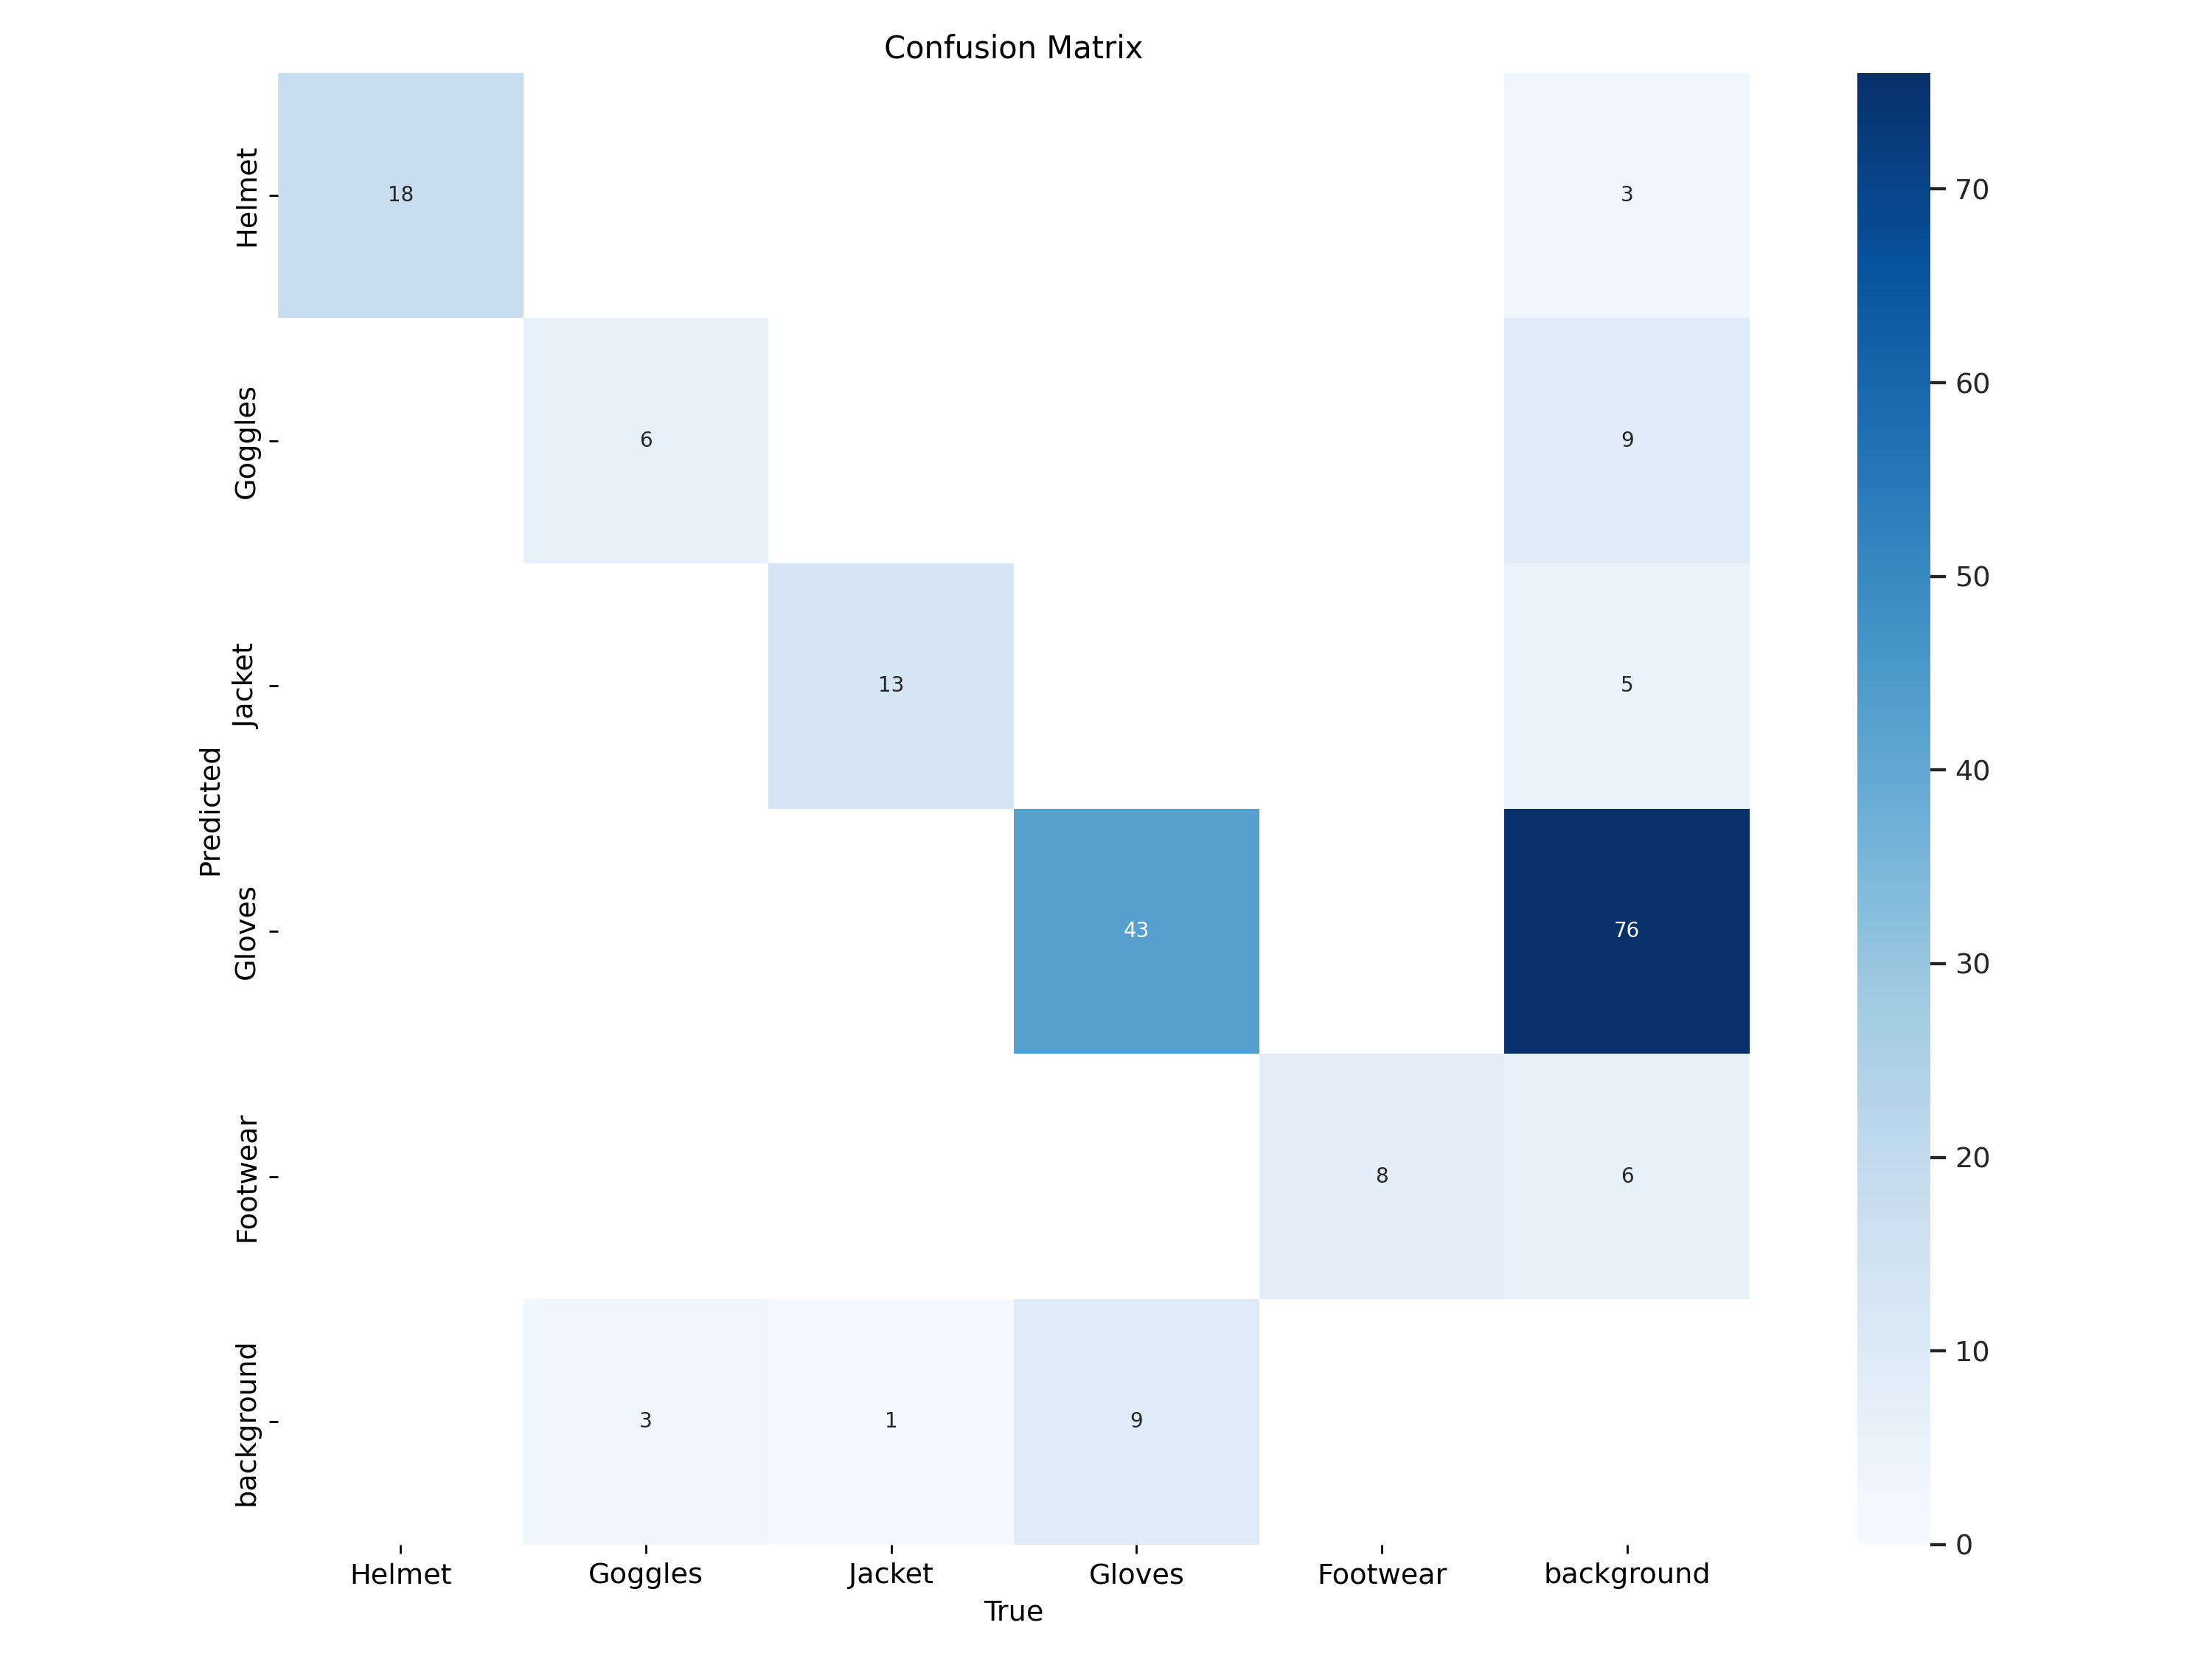

In [16]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

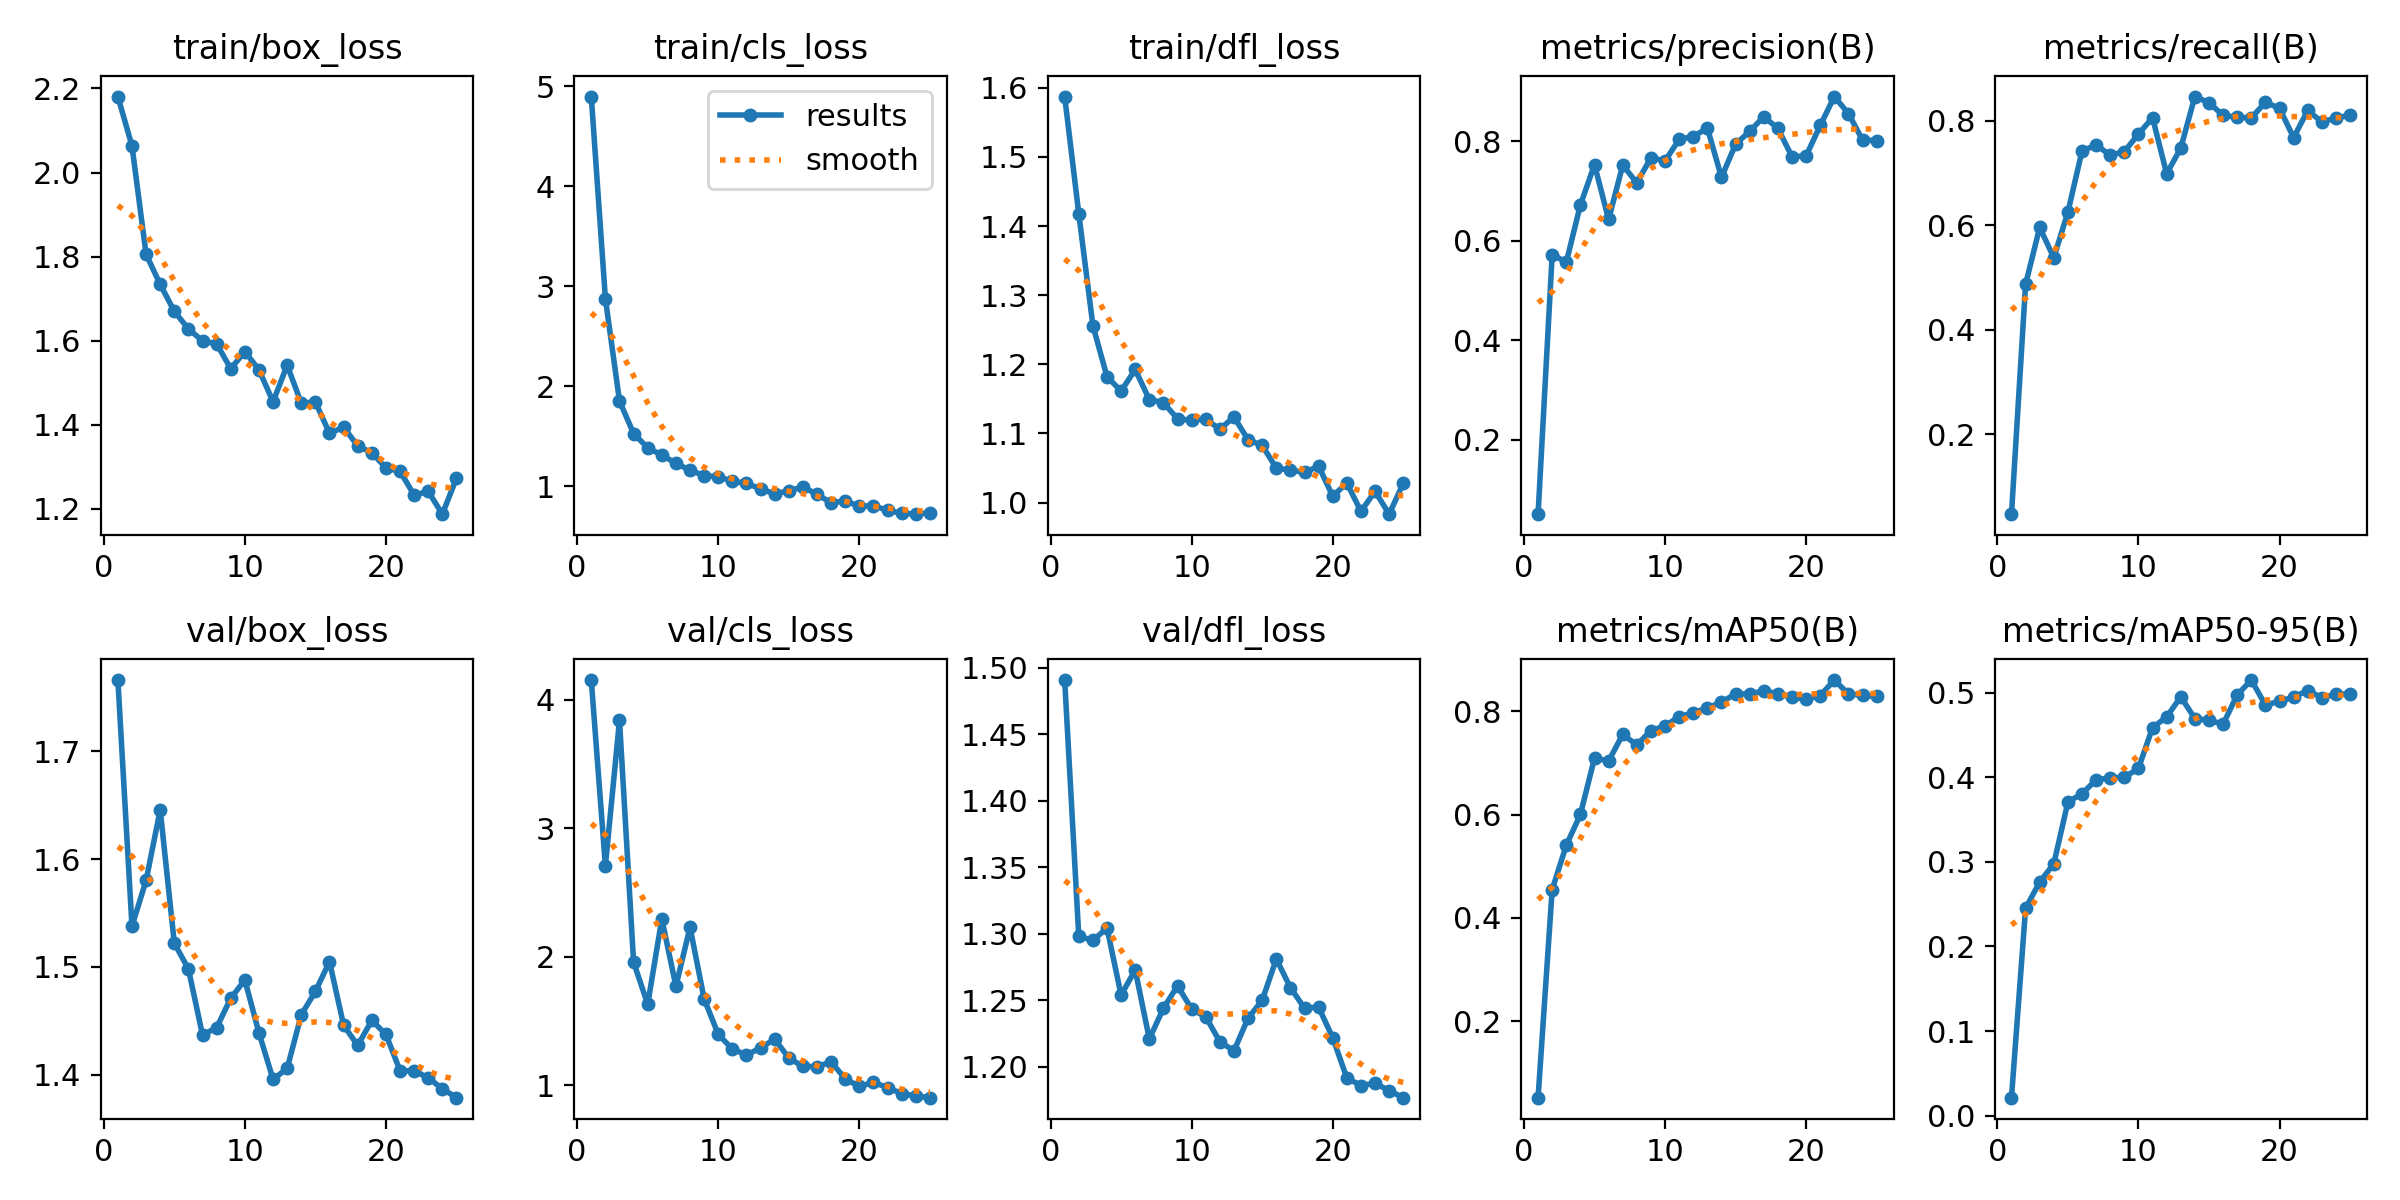

In [18]:
Image(filename='runs/detect/train/results.png', width=600)

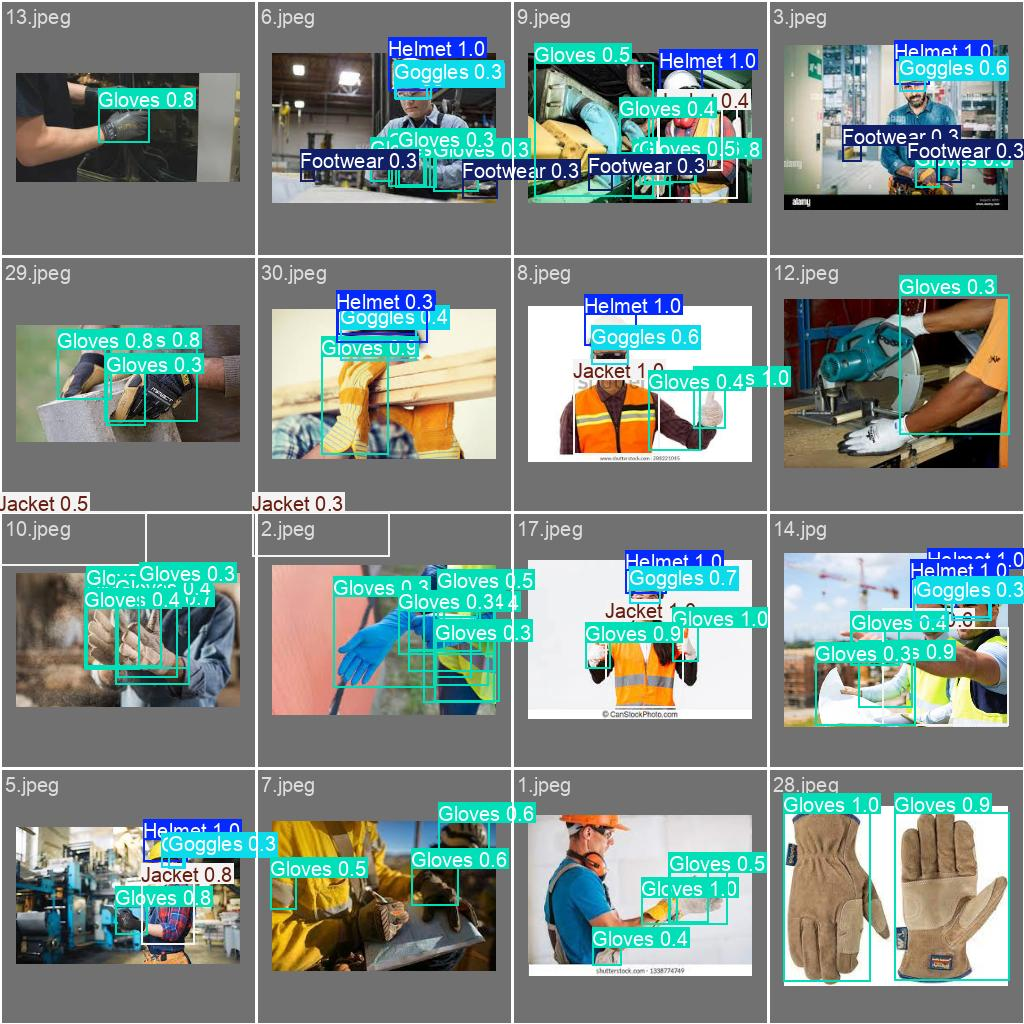

In [19]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.78it/s]
                   all         31        101      0.812      0.821      0.827      0.509
                Helmet         17         18      0.921          1      0.995      0.697
               Goggles          9          9      0.709      0.556      0.611      0.271
                Jacket         13         14      0.883      0.857      0.858      0.685
                Gloves         30         52      0.636      0.692      0.677      0.363
              Footwear          4          8      0.913          1      0.995      0.529
Speed: 1.1ms preprocess, 10.4ms inference

## Inference with Custom Model

In [21]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/Yolov8/data/test/images/1.jpeg: 192x224 2 Glovess, 40.3ms
image 2/31 /content/drive/MyDrive/Yolov8/data/test/images/10.jpeg: 160x224 1 Jacket, 6 Glovess, 42.7ms
image 3/31 /content/drive/MyDrive/Yolov8/data/test/images/11.jpeg: 224x224 1 Goggles, 1 Jacket, 7 Glovess, 8.6ms
image 4/31 /content/drive/MyDrive/Yolov8/data/test/images/12.jpeg: 192x224 (no detections), 8.5ms
image 5/31 /content/drive/MyDrive/Yolov8/data/test/images/13.jpeg: 128x224 1 Gloves, 38.7ms
image 6/31 /content/drive/MyDrive/Yolov8/data/test/images/14(1).jpeg: 224x224 2 Glovess, 9.4ms
image 7/31 /content/drive/MyDrive/Yolov8/data/test/images/14.jpg: 192x224 2 Helmets, 3 Goggless, 1 Jacket, 3 Glovess, 8.4ms
image 8/31 /content/drive/MyDrive/Yolov8/data/test/images/15.jpeg: 224x224 1 Helmet, 1 Jacket, 12 Glovess, 8.5ms
imag

**NOTE:** Let's take a look at few results.

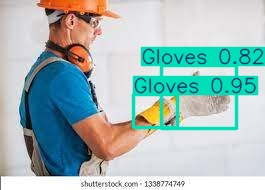

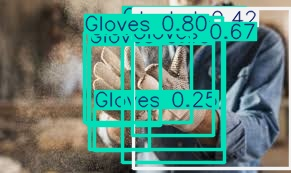

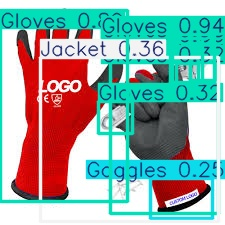

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import os

class HybridPSOGWO:
    def __init__(self, num_particles, num_wolves, dimensions, bounds, max_iter):
        self.num_particles = num_particles
        self.num_wolves = num_wolves
        self.dimensions = dimensions
        self.bounds = bounds
        self.max_iter = max_iter
        self.data_path = '/content/drive/MyDrive/Yolov8/data.yaml'  # Absolute path

        # PSO parameters
        self.w = 0.7  # inertia weight
        self.c1 = 1.5  # cognitive coefficient
        self.c2 = 1.5  # social coefficient

        # GWO parameters
        self.a = 2  # decreases linearly from 2 to 0

        # Initialize populations
        self.particles = np.random.uniform(low=bounds[0], high=bounds[1],
                                         size=(num_particles, dimensions))
        self.wolves = np.random.uniform(low=bounds[0], high=bounds[1],
                                      size=(num_wolves, dimensions))

        # Initialize velocities
        self.velocities = np.zeros((num_particles, dimensions))

        # Initialize personal bests
        self.pbest_pos = self.particles.copy()
        self.pbest_val = np.full(num_particles, np.inf)

        # Initialize wolf hierarchy
        self.alpha_pos = None
        self.alpha_score = np.inf
        self.beta_pos = None
        self.beta_score = np.inf
        self.delta_pos = None
        self.delta_score = np.inf

        # Global best
        self.gbest_pos = self.particles[0].copy()  # Initialize with first particle
        self.gbest_val = np.inf

    def evaluate_fitness(self, position):
        """Evaluate fitness with proper path handling and error checking"""
        position = [float(x) for x in position]  # Ensure native Python floats

        try:
            model = YOLO('yolov8s.pt')
            results = model.train(
                data=self.data_path,
                epochs=5,  # Reduced for faster evaluation
                imgsz=224,
                lr0=position[0],
                momentum=position[1],
                weight_decay=position[2],
                hsv_h=position[3],
                hsv_s=position[4],
                verbose=False,
                plots=False,
                save=False
            )
            return -float(results.results_dict['metrics/mAP50(B)'])  # Negative for minimization
        except Exception as e:
            print(f"Training failed: {str(e)}")
            return float('inf')  # Return worst possible score

    def update_a(self, iteration):
        """Update GWO's a parameter"""
        self.a = 2 - iteration * (2 / self.max_iter)

    def run(self):
        """Run the hybrid optimization with robust error handling"""
        history = []

        # Initialize gbest with first particle evaluation
        self.gbest_val = self.evaluate_fitness(self.gbest_pos)

        for iteration in tqdm(range(self.max_iter), desc="Optimizing"):
            self.update_a(iteration)

            # Evaluate populations
            for i in range(self.num_particles):
                fitness = self.evaluate_fitness(self.particles[i])

                # Update personal best
                if fitness < self.pbest_val[i]:
                    self.pbest_val[i] = fitness
                    self.pbest_pos[i] = self.particles[i].copy()

                # Update global best
                if fitness < self.gbest_val:
                    self.gbest_val = fitness
                    self.gbest_pos = self.particles[i].copy()

            # Evaluate wolves
            for i in range(self.num_wolves):
                fitness = self.evaluate_fitness(self.wolves[i])

                # Update wolf hierarchy
                if fitness < self.alpha_score:
                    self.alpha_score, self.alpha_pos = fitness, self.wolves[i].copy()
                elif fitness < self.beta_score:
                    self.beta_score, self.beta_pos = fitness, self.wolves[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score, self.delta_pos = fitness, self.wolves[i].copy()

            # Update positions
            r1 = np.random.rand(self.num_particles, self.dimensions)
            r2 = np.random.rand(self.num_particles, self.dimensions)
            self.velocities = (self.w * self.velocities +
                             self.c1 * r1 * (self.pbest_pos - self.particles) +
                             self.c2 * r2 * (self.gbest_pos - self.particles))
            self.particles = np.clip(self.particles + self.velocities, self.bounds[0], self.bounds[1])

            # Update wolves
            a_vec = 2 * self.a * np.random.rand(self.num_wolves, self.dimensions) - self.a
            C = 2 * np.random.rand(self.num_wolves, self.dimensions)
            D_alpha = np.abs(C * self.alpha_pos - self.wolves)
            X1 = self.alpha_pos - a_vec * D_alpha
            self.wolves = np.clip(X1, self.bounds[0], self.bounds[1])

            # Log progress
            current_best = min(self.gbest_val, self.alpha_score)
            best_pos = self.gbest_pos if self.gbest_val < self.alpha_score else self.alpha_pos
            history.append({
                'iteration': iteration,
                'best_fitness': current_best,
                'best_position': best_pos
            })

            print(f"Iteration {iteration}: Best mAP50 = {-current_best:.4f}")

        return history

# Initialize and run
bounds = (np.array([0.0001, 0.8, 0.00001, 0.0, 0.0]),
          np.array([0.01, 0.99, 0.001, 0.1, 0.9]))

optimizer = HybridPSOGWO(
    num_particles=5,
    num_wolves=3,
    dimensions=5,
    bounds=bounds,
    max_iter=3
)

print("Starting optimization...")
history = optimizer.run()

# Display results
if history:
    best = history[-1]
    print("\nOptimization Complete!")
    print(f"Best mAP50: {-best['best_fitness']:.4f}")
    print("Best Parameters:")
    print(f"Learning Rate: {best['best_position'][0]:.6f}")
    print(f"Momentum: {best['best_position'][1]:.4f}")
    print(f"Weight Decay: {best['best_position'][2]:.6f}")
    print(f"HSV-H: {best['best_position'][3]:.4f}")
    print(f"HSV-S: {best['best_position'][4]:.4f}")
else:
    print("Optimization failed to produce results")

Starting optimization...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005744948027137009' and 'momentum=0.8833342875578409' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000988490099678634), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train19
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      0.74G      2.174      4.869      1.574         62        224: 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         31        101      0.315     0.0476     0.0603     0.0239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/5     0.852G      2.074      2.973      1.413        102        224: 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         31        101      0.641      0.536      0.452      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/5     0.852G      1.836      1.938      1.276         71        224: 100%|██████████| 8/8 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         31        101      0.403       0.55       0.48      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.852G      1.783      1.639      1.223         66        224: 100%|██████████| 8/8 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         31        101      0.538      0.664      0.553      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        5/5     0.852G      1.676       1.44       1.19         56        224: 100%|██████████| 8/8 [00:00<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         31        101      0.606      0.626      0.624       0.33



5 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 22.5MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         31        101       0.61      0.626      0.631      0.334
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.4ms postprocess per image



Optimizing:   0%|          | 0/3 [00:00<?, ?it/s]

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005744948027137009' and 'momentum=0.8833342875578409' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000988490099678634), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train20
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.855G      2.126      5.027      1.549        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.855G      2.126      5.027      1.549        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.35it/s]
        1/5     0.855G      2.227      5.098      1.543        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.35it/s]
        1/5     0.855G      2.227      5.098      1.543        101        224:  25%|██▌       | 2/8 [00:00<00:01,  5.53it/s]
        1/5     0.855G       2.19       4.96      1.574        155        224:  25%|██▌       | 2/8 [00:00<00:01,  5.53it/s]
        1/5     0.855G       2.19       4.96      1.574        155        224:  38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]
        1/5     0.855G      2.218       5.04      1.561        131        224:  38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]
        1/5     0.855G      2.218       5.04      1.561        131        224:  50%|█████     

                   all         31        101      0.315     0.0476     0.0603     0.0239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.06G      2.128      3.816      1.498        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.06G      2.128      3.816      1.498        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.91it/s]
        2/5      1.06G      2.132      3.872       1.52        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.91it/s]
        2/5      1.06G      2.132      3.872       1.52        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.62it/s]
        2/5      1.06G      2.161      3.606      1.502        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.62it/s]
        2/5      1.06G      2.161      3.606      1.502        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.38it/s]
        2/5      1.06G      2.146      3.479      1.493        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.38it/s]
        2/5      1.06G      2.146      3.479      1.493        117        224:  50%|█████    

                   all         31        101      0.641      0.536      0.452      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.869      2.248      1.325        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.869      2.248      1.325        132        224:  12%|█▎        | 1/8 [00:00<00:00,  7.16it/s]
        3/5      1.07G      1.879      2.183      1.337        133        224:  12%|█▎        | 1/8 [00:00<00:00,  7.16it/s]
        3/5      1.07G      1.879      2.183      1.337        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.65it/s]
        3/5      1.07G      1.874        2.1      1.311        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.65it/s]
        3/5      1.07G      1.874        2.1      1.311        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.51it/s]
        3/5      1.07G      1.831      2.056      1.309        127        224:  38%|███▊      | 3/8 [00:00<00:00,  7.51it/s]
        3/5      1.07G       1.83      2.025      1.298        152        224:  38%|███▊     

                   all         31        101      0.403       0.55       0.48      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.768      1.712      1.187        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.768      1.712      1.187        168        224:  12%|█▎        | 1/8 [00:00<00:00,  8.39it/s]
        4/5      1.07G       1.73      1.745        1.2        143        224:  12%|█▎        | 1/8 [00:00<00:00,  8.39it/s]
        4/5      1.07G       1.73      1.745        1.2        143        224:  25%|██▌       | 2/8 [00:00<00:00,  8.14it/s]
        4/5      1.07G      1.762      1.719      1.218        169        224:  25%|██▌       | 2/8 [00:00<00:00,  8.14it/s]
        4/5      1.07G      1.762      1.719      1.218        169        224:  38%|███▊      | 3/8 [00:00<00:00,  8.13it/s]
        4/5      1.07G      1.732      1.689      1.201        136        224:  38%|███▊      | 3/8 [00:00<00:00,  8.13it/s]
        4/5      1.07G      1.762      1.687      1.207        218        224:  38%|███▊     

                   all         31        101      0.538      0.664      0.553      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.633       1.59      1.236        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.633       1.59      1.236        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.48it/s]
        5/5      1.07G      1.746      1.553      1.249        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.48it/s]
        5/5      1.07G      1.736       1.51      1.235        147        224:  12%|█▎        | 1/8 [00:00<00:01,  6.48it/s]
        5/5      1.07G      1.736       1.51      1.235        147        224:  38%|███▊      | 3/8 [00:00<00:00,  8.48it/s]
        5/5      1.07G       1.73      1.508      1.225        128        224:  38%|███▊      | 3/8 [00:00<00:00,  8.48it/s]
        5/5      1.07G      1.721      1.476      1.218        105        224:  38%|███▊      | 3/8 [00:00<00:00,  8.48it/s]
        5/5      1.07G      1.721      1.476      1.218        105        224:  62%|██████▎   

                   all         31        101      0.606      0.626      0.624       0.33



5 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train20/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train20/weights/best.pt, 22.5MB

Validating runs/detect/train20/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         31        101       0.61      0.626      0.631      0.334
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 1.4ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0016969642270614632' and 'momentum=0.9240905818384257' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00026075868651438433), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train21
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.863G      2.091      5.034      1.533        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.863G      2.091      5.034      1.533        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.56it/s]
        1/5     0.863G      2.195      5.117      1.529        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.56it/s]
        1/5     0.863G      2.195      5.117      1.529        101        224:  25%|██▌       | 2/8 [00:00<00:01,  5.36it/s]
        1/5     0.863G      2.176      4.995      1.564        155        224:  25%|██▌       | 2/8 [00:00<00:01,  5.36it/s]
        1/5     0.863G      2.176      4.995      1.564        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]
        1/5     0.863G      2.228      5.073      1.561        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.79it/s]
        1/5     0.863G      2.228      5.073      1.561        131        224:  50%|█████     

                   all         31        101     0.0958     0.0476     0.0472     0.0195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.184        3.8       1.53        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.184        3.8       1.53        176        224:  12%|█▎        | 1/8 [00:00<00:00,  7.01it/s]
        2/5      1.07G      2.155      3.903      1.531        136        224:  12%|█▎        | 1/8 [00:00<00:00,  7.01it/s]
        2/5      1.07G      2.155      3.903      1.531        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.75it/s]
        2/5      1.07G      2.185      3.633      1.512        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.75it/s]
        2/5      1.07G      2.185      3.633      1.512        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.77it/s]
        2/5      1.07G      2.165      3.485      1.501        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.77it/s]
        2/5      1.07G      2.165      3.485      1.501        117        224:  50%|█████    

                   all         31        101      0.566      0.489      0.461      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.08G      1.878      2.231      1.313        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.08G      1.878      2.231      1.313        132        224:  12%|█▎        | 1/8 [00:00<00:00,  7.56it/s]
        3/5      1.08G      1.883      2.169      1.329        133        224:  12%|█▎        | 1/8 [00:00<00:00,  7.56it/s]
        3/5      1.08G      1.883      2.169      1.329        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.90it/s]
        3/5      1.08G      1.855      2.103      1.298        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.90it/s]
        3/5      1.08G      1.855      2.103      1.298        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.59it/s]
        3/5      1.08G      1.831      2.064      1.304        127        224:  38%|███▊      | 3/8 [00:00<00:00,  7.59it/s]
        3/5      1.08G      1.829      2.029      1.296        152        224:  38%|███▊     

                   all         31        101      0.383      0.508      0.473      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.08G      1.771       1.77      1.163        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.08G      1.771       1.77      1.163        168        224:  12%|█▎        | 1/8 [00:00<00:00,  7.41it/s]
        4/5      1.08G      1.741      1.809       1.18        143        224:  12%|█▎        | 1/8 [00:00<00:00,  7.41it/s]
        4/5      1.08G      1.741      1.809       1.18        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.77it/s]
        4/5      1.08G      1.768      1.764      1.201        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.77it/s]
        4/5      1.08G      1.768      1.764      1.201        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.79it/s]
        4/5      1.08G      1.744      1.728      1.186        136        224:  38%|███▊      | 3/8 [00:00<00:00,  7.79it/s]
        4/5      1.08G      1.744      1.728      1.186        136        224:  50%|█████    

                   all         31        101      0.501      0.704      0.603       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.08G      1.692      1.582      1.232        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.08G      1.692      1.582      1.232        128        224:  12%|█▎        | 1/8 [00:00<00:00,  8.74it/s]
        5/5      1.08G      1.777      1.551      1.244        135        224:  12%|█▎        | 1/8 [00:00<00:00,  8.74it/s]
        5/5      1.08G      1.777      1.551      1.244        135        224:  25%|██▌       | 2/8 [00:00<00:00,  8.72it/s]
        5/5      1.08G       1.77      1.521      1.232        147        224:  25%|██▌       | 2/8 [00:00<00:00,  8.72it/s]
        5/5      1.08G       1.77      1.521      1.232        147        224:  38%|███▊      | 3/8 [00:00<00:00,  8.25it/s]
        5/5      1.08G      1.762      1.516      1.222        128        224:  38%|███▊      | 3/8 [00:00<00:00,  8.25it/s]
        5/5      1.08G      1.745      1.471      1.209        105        224:  38%|███▊     

                   all         31        101      0.544      0.671      0.655      0.341



5 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 22.5MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         31        101      0.546      0.671      0.651      0.341
Speed: 0.3ms preprocess, 1.2ms inference, 0.0ms loss, 3.3ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0016737988780906453' and 'momentum=0.8209712768212181' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0006597662935706207), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.861G      2.111      5.043      1.543        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.861G      2.111      5.043      1.543        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.74it/s]
        1/5     0.861G       2.22      5.106      1.541        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.74it/s]
        1/5     0.861G       2.22      5.106      1.541        101        224:  25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]
        1/5     0.861G      2.187      4.965      1.575        155        224:  25%|██▌       | 2/8 [00:00<00:01,  5.20it/s]
        1/5     0.861G      2.187      4.965      1.575        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]
        1/5     0.861G      2.216      5.044      1.561        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.17it/s]
        1/5     0.861G      2.216      5.044      1.561        131        224:  50%|█████     

                   all         31        101     0.0563     0.0476     0.0567     0.0215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.126      3.823      1.497        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.126      3.823      1.497        176        224:  12%|█▎        | 1/8 [00:00<00:00,  7.21it/s]
        2/5      1.07G       2.13      3.872      1.523        136        224:  12%|█▎        | 1/8 [00:00<00:00,  7.21it/s]
        2/5      1.07G       2.13      3.872      1.523        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        2/5      1.07G      2.163      3.611      1.505        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        2/5      1.07G      2.163      3.611      1.505        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.27it/s]
        2/5      1.07G      2.147      3.477      1.495        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.27it/s]
        2/5      1.07G      2.147      3.477      1.495        117        224:  50%|█████    

                   all         31        101       0.58      0.487      0.459      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.882      2.247      1.321        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.882      2.247      1.321        132        224:  12%|█▎        | 1/8 [00:00<00:00,  7.12it/s]
        3/5      1.07G      1.877      2.188      1.332        133        224:  12%|█▎        | 1/8 [00:00<00:00,  7.12it/s]
        3/5      1.07G      1.877      2.188      1.332        133        224:  25%|██▌       | 2/8 [00:00<00:00,  8.04it/s]
        3/5      1.07G      1.877      2.098      1.305        169        224:  25%|██▌       | 2/8 [00:00<00:00,  8.04it/s]
        3/5      1.07G      1.877      2.098      1.305        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.71it/s]
        3/5      1.07G      1.845       2.06      1.307        127        224:  38%|███▊      | 3/8 [00:00<00:00,  7.71it/s]
        3/5      1.07G      1.842      2.021      1.297        152        224:  38%|███▊     

                   all         31        101      0.368      0.637       0.48      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.775      1.765      1.186        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.775      1.765      1.186        168        224:  12%|█▎        | 1/8 [00:00<00:01,  3.72it/s]
        4/5      1.07G      1.732      1.802      1.197        143        224:  12%|█▎        | 1/8 [00:00<00:01,  3.72it/s]
        4/5      1.07G      1.732      1.802      1.197        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.57it/s]
        4/5      1.07G      1.755      1.762      1.209        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.57it/s]
        4/5      1.07G      1.755      1.762      1.209        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]
        4/5      1.07G      1.727      1.719      1.196        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]
        4/5      1.07G      1.727      1.719      1.196        136        224:  50%|█████    

                   all         31        101      0.549      0.609      0.551      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.656      1.582      1.237        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.656      1.582      1.237        128        224:  12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]
        5/5      1.07G      1.745      1.562      1.247        135        224:  12%|█▎        | 1/8 [00:00<00:02,  2.91it/s]
        5/5      1.07G      1.745      1.562      1.247        135        224:  25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]
        5/5      1.07G      1.748      1.519      1.243        147        224:  25%|██▌       | 2/8 [00:00<00:01,  4.07it/s]
        5/5      1.07G      1.748      1.519      1.243        147        224:  38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]
        5/5      1.07G      1.736       1.51      1.228        128        224:  38%|███▊      | 3/8 [00:00<00:01,  3.77it/s]
        5/5      1.07G      1.736       1.51      1.228        128        224:  50%|█████    

                   all         31        101      0.719       0.52      0.666      0.336



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 22.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         31        101      0.718       0.52      0.669      0.337
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003750379189543545' and 'momentum=0.9559887136711076' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00010613026303513065), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train23
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.071      4.934      1.522        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.071      4.934      1.522        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.44it/s]
        1/5     0.879G      2.194      5.105      1.527        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.44it/s]
        1/5     0.879G      2.194      5.105      1.527        101        224:  25%|██▌       | 2/8 [00:00<00:00,  6.36it/s]
        1/5     0.879G      2.156      4.976      1.554        155        224:  25%|██▌       | 2/8 [00:00<00:00,  6.36it/s]
        1/5     0.879G      2.156      4.976      1.554        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]
        1/5     0.879G       2.21      5.086      1.548        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.95it/s]
        1/5     0.879G       2.21      5.086      1.548        131        224:  50%|█████     

                   all         31        101     0.0126     0.0286     0.0116    0.00363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G       2.18      4.145      1.541        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G       2.18      4.145      1.541        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.58it/s]
        2/5      1.09G      2.172       4.22      1.551        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.58it/s]
        2/5      1.09G      2.172       4.22      1.551        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.31it/s]
        2/5      1.09G       2.23       3.96      1.536        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.31it/s]
        2/5      1.09G       2.23       3.96      1.536        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.41it/s]
        2/5      1.09G      2.214      3.775      1.532        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.41it/s]
        2/5      1.09G      2.214      3.775      1.532        117        224:  50%|█████    

                   all         31        101      0.731      0.449      0.443      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G       1.84      2.324      1.306        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G       1.84      2.324      1.306        132        224:  12%|█▎        | 1/8 [00:00<00:01,  4.50it/s]
        3/5      1.09G       1.86      2.236      1.336        133        224:  12%|█▎        | 1/8 [00:00<00:01,  4.50it/s]
        3/5      1.09G       1.86      2.236      1.336        133        224:  25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]
        3/5      1.09G      1.855      2.157      1.312        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.64it/s]
        3/5      1.09G      1.855      2.157      1.312        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.83it/s]
        3/5      1.09G      1.848       2.12      1.325        127        224:  38%|███▊      | 3/8 [00:00<00:01,  4.83it/s]
        3/5      1.09G      1.848       2.12      1.325        127        224:  50%|█████    

                   all         31        101      0.495       0.52      0.505      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.753      1.795      1.172        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.753      1.795      1.172        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.10it/s]
        4/5      1.09G      1.752      1.863      1.198        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.10it/s]
        4/5      1.09G      1.752      1.863      1.198        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]
        4/5      1.09G      1.782      1.813      1.219        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.70it/s]
        4/5      1.09G      1.782      1.813      1.219        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]
        4/5      1.09G      1.762      1.777      1.203        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.68it/s]
        4/5      1.09G      1.762      1.777      1.203        136        224:  50%|█████    

                   all         31        101      0.622      0.619      0.654      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.663      1.577      1.238        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.663      1.577      1.238        128        224:  12%|█▎        | 1/8 [00:00<00:00,  8.56it/s]
        5/5      1.09G      1.749      1.576      1.241        135        224:  12%|█▎        | 1/8 [00:00<00:00,  8.56it/s]
        5/5      1.09G      1.751      1.543      1.229        147        224:  12%|█▎        | 1/8 [00:00<00:00,  8.56it/s]
        5/5      1.09G      1.751      1.543      1.229        147        224:  38%|███▊      | 3/8 [00:00<00:00,  8.90it/s]
        5/5      1.09G      1.735      1.533      1.218        128        224:  38%|███▊      | 3/8 [00:00<00:00,  8.90it/s]
        5/5      1.09G      1.735      1.502      1.212        105        224:  38%|███▊      | 3/8 [00:00<00:00,  8.90it/s]
        5/5      1.09G      1.735      1.502      1.212        105        224:  62%|██████▎  

                   all         31        101      0.734      0.612      0.706      0.358



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 22.5MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         31        101      0.735      0.612      0.706      0.356
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.009766948703632618' and 'momentum=0.8890437283130633' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0009769934773084337), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train24
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.861G      2.086      5.016       1.54        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.861G      2.086      5.016       1.54        106        224:  12%|█▎        | 1/8 [00:00<00:01,  4.43it/s]
        1/5     0.861G       2.21      5.119      1.536        101        224:  12%|█▎        | 1/8 [00:00<00:01,  4.43it/s]
        1/5     0.861G       2.21      5.119      1.536        101        224:  25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]
        1/5     0.861G      2.188      4.994      1.573        155        224:  25%|██▌       | 2/8 [00:00<00:01,  3.77it/s]
        1/5     0.861G      2.188      4.994      1.573        155        224:  38%|███▊      | 3/8 [00:00<00:01,  3.50it/s]
        1/5     0.861G      2.248      5.088      1.565        131        224:  38%|███▊      | 3/8 [00:01<00:01,  3.50it/s]
        1/5     0.861G      2.248      5.088      1.565        131        224:  50%|█████     

                   all         31        101     0.0377     0.0476     0.0282     0.0113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.187      3.802      1.528        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.187      3.802      1.528        176        224:  12%|█▎        | 1/8 [00:00<00:01,  3.58it/s]
        2/5      1.05G      2.167      3.924      1.535        136        224:  12%|█▎        | 1/8 [00:00<00:01,  3.58it/s]
        2/5      1.05G      2.167      3.924      1.535        136        224:  25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]
        2/5      1.05G      2.199      3.671      1.522        151        224:  25%|██▌       | 2/8 [00:00<00:01,  3.97it/s]
        2/5      1.05G      2.199      3.671      1.522        151        224:  38%|███▊      | 3/8 [00:00<00:01,  4.06it/s]
        2/5      1.05G      2.186      3.517      1.513        117        224:  38%|███▊      | 3/8 [00:00<00:01,  4.06it/s]
        2/5      1.05G      2.186      3.517      1.513        117        224:  50%|█████    

                   all         31        101      0.844      0.379      0.426      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.851      2.291      1.317        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.851      2.291      1.317        132        224:  12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]
        3/5      1.05G      1.883      2.186      1.351        133        224:  12%|█▎        | 1/8 [00:00<00:01,  4.60it/s]
        3/5      1.05G      1.883      2.186      1.351        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.31it/s]
        3/5      1.05G      1.857      2.112      1.319        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.31it/s]
        3/5      1.05G      1.857      2.112      1.319        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.67it/s]
        3/5      1.05G      1.839      2.081      1.326        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.67it/s]
        3/5      1.05G      1.839      2.081      1.326        127        224:  50%|█████    

                   all         31        101      0.451      0.493      0.473      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.772      1.737      1.177        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.772      1.737      1.177        168        224:  12%|█▎        | 1/8 [00:00<00:00,  7.83it/s]
        4/5      1.05G      1.733      1.816      1.206        143        224:  12%|█▎        | 1/8 [00:00<00:00,  7.83it/s]
        4/5      1.05G      1.733      1.816      1.206        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.92it/s]
        4/5      1.05G      1.773      1.775      1.223        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.92it/s]
        4/5      1.05G      1.773      1.775      1.223        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.89it/s]
        4/5      1.05G      1.752      1.736      1.205        136        224:  38%|███▊      | 3/8 [00:00<00:00,  7.89it/s]
        4/5      1.05G      1.773      1.734      1.207        218        224:  38%|███▊     

                   all         31        101      0.579      0.561      0.572      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.666      1.573      1.245        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.666      1.573      1.245        128        224:  12%|█▎        | 1/8 [00:00<00:00,  7.30it/s]
        5/5      1.05G      1.749      1.557      1.245        135        224:  12%|█▎        | 1/8 [00:00<00:00,  7.30it/s]
        5/5      1.05G      1.749      1.557      1.245        135        224:  25%|██▌       | 2/8 [00:00<00:00,  8.57it/s]
        5/5      1.05G      1.764      1.521      1.235        147        224:  25%|██▌       | 2/8 [00:00<00:00,  8.57it/s]
        5/5      1.05G      1.764      1.521      1.235        147        224:  38%|███▊      | 3/8 [00:00<00:00,  8.01it/s]
        5/5      1.05G      1.753      1.495      1.224        128        224:  38%|███▊      | 3/8 [00:00<00:00,  8.01it/s]
        5/5      1.05G      1.753      1.495      1.224        128        224:  50%|█████    

                   all         31        101       0.59      0.626      0.646      0.326



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 22.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         31        101      0.598      0.628      0.649      0.326
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 1.9ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0004879591433177747' and 'momentum=0.8537333228895179' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00012899459560103722), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train25
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.859G      2.108      5.029      1.533        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.859G      2.108      5.029      1.533        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.52it/s]
        1/5     0.859G      2.202      5.101      1.527        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.52it/s]
        1/5     0.859G      2.202      5.101      1.527        101        224:  25%|██▌       | 2/8 [00:00<00:01,  5.08it/s]
        1/5     0.859G      2.177      4.962      1.564        155        224:  25%|██▌       | 2/8 [00:00<00:01,  5.08it/s]
        1/5     0.859G      2.177      4.962      1.564        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]
        1/5     0.859G      2.218       5.04      1.557        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.47it/s]
        1/5     0.859G      2.218       5.04      1.557        131        224:  50%|█████     

                   all         31        101     0.0764     0.0476     0.0531     0.0221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.139      3.766      1.508        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.139      3.766      1.508        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.60it/s]
        2/5      1.07G      2.132      3.874      1.522        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.60it/s]
        2/5      1.07G      2.132      3.874      1.522        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.52it/s]
        2/5      1.07G      2.161      3.622      1.506        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.52it/s]
        2/5      1.07G      2.161      3.622      1.506        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.14it/s]
        2/5      1.07G      2.144       3.49      1.496        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.14it/s]
        2/5      1.07G      2.144       3.49      1.496        117        224:  50%|█████    

                   all         31        101      0.587      0.485      0.455      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.879      2.255      1.312        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.879      2.255      1.312        132        224:  12%|█▎        | 1/8 [00:00<00:00,  7.28it/s]
        3/5      1.07G      1.887      2.197      1.338        133        224:  12%|█▎        | 1/8 [00:00<00:00,  7.28it/s]
        3/5      1.07G      1.887      2.197      1.338        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.22it/s]
        3/5      1.07G      1.878      2.101      1.313        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.22it/s]
        3/5      1.07G      1.878      2.101      1.313        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.93it/s]
        3/5      1.07G      1.839      2.055       1.31        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.93it/s]
        3/5      1.07G      1.839      2.055       1.31        127        224:  50%|█████    

                   all         31        101      0.484        0.5      0.491      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.737      1.721      1.176        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.737      1.721      1.176        168        224:  12%|█▎        | 1/8 [00:00<00:00,  7.85it/s]
        4/5      1.07G      1.729      1.763      1.192        143        224:  12%|█▎        | 1/8 [00:00<00:00,  7.85it/s]
        4/5      1.07G      1.729      1.763      1.192        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.84it/s]
        4/5      1.07G      1.781      1.743      1.215        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.84it/s]
        4/5      1.07G      1.781      1.743      1.215        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.86it/s]
        4/5      1.07G      1.759      1.713      1.201        136        224:  38%|███▊      | 3/8 [00:00<00:00,  7.86it/s]
        4/5      1.07G      1.784      1.718      1.202        218        224:  38%|███▊     

                   all         31        101      0.673      0.577       0.65        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.675      1.533       1.24        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.675      1.533       1.24        128        224:  12%|█▎        | 1/8 [00:00<00:00,  8.52it/s]
        5/5      1.07G      1.767      1.542      1.247        135        224:  12%|█▎        | 1/8 [00:00<00:00,  8.52it/s]
        5/5      1.07G      1.767      1.542      1.247        135        224:  25%|██▌       | 2/8 [00:00<00:00,  8.83it/s]
        5/5      1.07G      1.761      1.503      1.234        147        224:  25%|██▌       | 2/8 [00:00<00:00,  8.83it/s]
        5/5      1.07G      1.761      1.503      1.234        147        224:  38%|███▊      | 3/8 [00:00<00:00,  8.06it/s]
        5/5      1.07G      1.752      1.494      1.224        128        224:  38%|███▊      | 3/8 [00:00<00:00,  8.06it/s]
        5/5      1.07G      1.746      1.464      1.215        105        224:  38%|███▊     

                   all         31        101      0.784      0.538      0.646      0.336



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train25/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train25/weights/best.pt, 22.5MB

Validating runs/detect/train25/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         31        101      0.784      0.539      0.646      0.336
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 1.5ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train26, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003248033476000363' and 'momentum=0.8787099689577873' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=7.350602138529651e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train26
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.859G      2.094       4.99      1.544        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.859G      2.094       4.99      1.544        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.26it/s]
        1/5     0.859G      2.203      5.125      1.533        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.26it/s]
        1/5     0.859G      2.203      5.125      1.533        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.59it/s]
        1/5     0.859G      2.182      5.001       1.57        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.59it/s]
        1/5     0.859G      2.182      5.001       1.57        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]
        1/5     0.859G      2.242      5.098      1.562        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]
        1/5     0.859G      2.242      5.098      1.562        131        224:  50%|█████     

                   all         31        101     0.0494     0.0869     0.0283     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.168      3.793      1.524        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.168      3.793      1.524        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.73it/s]
        2/5      1.05G      2.155      3.892      1.529        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.73it/s]
        2/5      1.05G      2.155      3.892      1.529        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.37it/s]
        2/5      1.05G      2.191       3.63      1.515        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.37it/s]
        2/5      1.05G      2.191       3.63      1.515        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.17it/s]
        2/5      1.05G       2.18      3.475      1.507        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.17it/s]
        2/5      1.05G       2.18      3.475      1.507        117        224:  50%|█████    

                   all         31        101      0.612      0.453       0.45      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G       1.82      2.243       1.31        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G       1.82      2.243       1.31        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.60it/s]
        3/5      1.05G      1.865      2.156       1.34        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.60it/s]
        3/5      1.05G      1.865      2.156       1.34        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.84it/s]
        3/5      1.05G      1.858      2.101      1.312        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.84it/s]
        3/5      1.05G      1.858      2.101      1.312        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.87it/s]
        3/5      1.05G       1.83      2.061      1.311        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.87it/s]
        3/5      1.05G      1.821      2.029      1.302        152        224:  38%|███▊     

                   all         31        101      0.565      0.437      0.514      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.748      1.726      1.162        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.748      1.726      1.162        168        224:  12%|█▎        | 1/8 [00:00<00:00,  7.09it/s]
        4/5      1.05G      1.758      1.791        1.2        143        224:  12%|█▎        | 1/8 [00:00<00:00,  7.09it/s]
        4/5      1.05G      1.758      1.791        1.2        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.63it/s]
        4/5      1.05G       1.78       1.76      1.216        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.63it/s]
        4/5      1.05G       1.78       1.76      1.216        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.41it/s]
        4/5      1.05G      1.757      1.732      1.201        136        224:  38%|███▊      | 3/8 [00:00<00:00,  7.41it/s]
        4/5      1.05G       1.78      1.733      1.203        218        224:  38%|███▊     

                   all         31        101      0.475      0.653      0.616      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.705      1.555       1.24        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.705      1.555       1.24        128        224:  12%|█▎        | 1/8 [00:00<00:00,  8.19it/s]
        5/5      1.05G      1.787       1.55      1.251        135        224:  12%|█▎        | 1/8 [00:00<00:00,  8.19it/s]
        5/5      1.05G      1.787       1.55      1.251        135        224:  25%|██▌       | 2/8 [00:00<00:00,  8.77it/s]
        5/5      1.05G      1.779      1.526      1.238        147        224:  25%|██▌       | 2/8 [00:00<00:00,  8.77it/s]
        5/5      1.05G      1.779      1.526      1.238        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.30it/s]
        5/5      1.05G       1.77      1.507      1.227        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.30it/s]
        5/5      1.05G      1.753      1.466      1.215        105        224:  38%|███▊     

                   all         31        101      0.691      0.605      0.668      0.335



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train26/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train26/weights/best.pt, 22.5MB

Validating runs/detect/train26/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         31        101      0.691      0.605      0.673      0.337


Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train27, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0027273559603005096' and 'momentum=0.899417130158673' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00010300110565085726), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train27
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.072      4.974       1.54        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.072      4.974       1.54        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.16it/s]
        1/5     0.879G      2.207      5.094      1.536        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.16it/s]
        1/5     0.879G      2.207      5.094      1.536        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]
        1/5     0.879G      2.188      4.979      1.576        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.97it/s]
        1/5     0.879G      2.188      4.979      1.576        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]
        1/5     0.879G       2.25      5.067      1.567        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.19it/s]
        1/5     0.879G       2.25      5.067      1.567        131        224:  50%|█████     

                   all         31        101      0.058     0.0726     0.0302     0.0103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.201       3.77      1.531        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.201       3.77      1.531        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.71it/s]
        2/5      1.07G      2.193      3.886      1.535        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.71it/s]
        2/5      1.07G      2.193      3.886      1.535        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.36it/s]
        2/5      1.07G      2.223      3.634      1.519        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.36it/s]
        2/5      1.07G      2.223      3.634      1.519        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.29it/s]
        2/5      1.07G      2.223       3.48      1.514        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.29it/s]
        2/5      1.07G      2.223       3.48      1.514        117        224:  50%|█████    

                   all         31        101      0.762      0.357      0.418      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.857      2.305       1.32        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.857      2.305       1.32        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.84it/s]
        3/5      1.07G      1.881      2.191      1.339        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.84it/s]
        3/5      1.07G      1.881      2.191      1.339        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.68it/s]
        3/5      1.07G      1.881      2.108      1.316        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.68it/s]
        3/5      1.07G      1.881      2.108      1.316        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.17it/s]
        3/5      1.07G      1.857       2.08       1.32        127        224:  38%|███▊      | 3/8 [00:00<00:00,  7.17it/s]
        3/5      1.07G      1.845      2.046       1.31        152        224:  38%|███▊     

                   all         31        101      0.688      0.476      0.476      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.748      1.783      1.172        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.748      1.783      1.172        168        224:  12%|█▎        | 1/8 [00:00<00:01,  3.75it/s]
        4/5      1.07G      1.738      1.815      1.197        143        224:  12%|█▎        | 1/8 [00:00<00:01,  3.75it/s]
        4/5      1.07G      1.738      1.815      1.197        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]
        4/5      1.07G      1.772      1.765      1.213        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.66it/s]
        4/5      1.07G      1.772      1.765      1.213        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]
        4/5      1.07G      1.743      1.724      1.195        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]
        4/5      1.07G      1.743      1.724      1.195        136        224:  50%|█████    

                   all         31        101      0.497      0.675      0.594       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G       1.67      1.566      1.234        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G       1.67      1.566      1.234        128        224:  12%|█▎        | 1/8 [00:00<00:01,  3.62it/s]
        5/5      1.07G      1.763      1.555      1.245        135        224:  12%|█▎        | 1/8 [00:00<00:01,  3.62it/s]
        5/5      1.07G      1.763      1.555      1.245        135        224:  25%|██▌       | 2/8 [00:00<00:01,  5.35it/s]
        5/5      1.07G      1.761      1.517      1.232        147        224:  25%|██▌       | 2/8 [00:00<00:01,  5.35it/s]
        5/5      1.07G      1.761      1.517      1.232        147        224:  38%|███▊      | 3/8 [00:00<00:01,  4.64it/s]
        5/5      1.07G      1.751      1.499       1.22        128        224:  38%|███▊      | 3/8 [00:00<00:01,  4.64it/s]
        5/5      1.07G      1.751      1.499       1.22        128        224:  50%|█████    

                   all         31        101      0.681      0.617      0.656      0.364



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 22.5MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         31        101      0.699      0.617      0.658      0.365
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.4ms postprocess per image


Optimizing:  33%|███▎      | 1/3 [02:13<04:27, 133.50s/it]

Iteration 0: Best mAP50 = 0.7059
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train28, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003830398235645717' and 'momentum=0.8989571638000726' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=1e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train28
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G      2.084      4.919       1.52        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G      2.084      4.919       1.52        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.24it/s]
        1/5     0.875G      2.196      5.078       1.53        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.24it/s]
        1/5     0.875G      2.196      5.078       1.53        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.51it/s]
        1/5     0.875G      2.168       4.96       1.56        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.51it/s]
        1/5     0.875G      2.168       4.96       1.56        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.07it/s]
        1/5     0.875G      2.214      5.065      1.553        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.07it/s]
        1/5     0.875G      2.214      5.065      1.553        131        224:  50%|█████     

                   all         31        101     0.0489     0.0476     0.0359      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.08G      2.185      3.773      1.522        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.08G      2.185      3.773      1.522        176        224:  12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]
        2/5      1.08G      2.151      3.862      1.522        136        224:  12%|█▎        | 1/8 [00:00<00:01,  5.24it/s]
        2/5      1.08G      2.151      3.862      1.522        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.15it/s]
        2/5      1.08G      2.196      3.607      1.508        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.15it/s]
        2/5      1.08G      2.196      3.607      1.508        151        224:  38%|███▊      | 3/8 [00:00<00:01,  4.55it/s]
        2/5      1.08G      2.183       3.46      1.503        117        224:  38%|███▊      | 3/8 [00:00<00:01,  4.55it/s]
        2/5      1.08G      2.183       3.46      1.503        117        224:  50%|█████    

                   all         31        101       0.81      0.382      0.458      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.859      2.253      1.314        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.859      2.253      1.314        132        224:  12%|█▎        | 1/8 [00:00<00:01,  3.83it/s]
        3/5      1.09G      1.871      2.181      1.337        133        224:  12%|█▎        | 1/8 [00:00<00:01,  3.83it/s]
        3/5      1.09G      1.871      2.181      1.337        133        224:  25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]
        3/5      1.09G      1.854      2.097      1.305        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.03it/s]
        3/5      1.09G      1.854      2.097      1.305        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]
        3/5      1.09G      1.832      2.043      1.306        127        224:  38%|███▊      | 3/8 [00:00<00:01,  4.60it/s]
        3/5      1.09G      1.832      2.043      1.306        127        224:  50%|█████    

                   all         31        101      0.405      0.532      0.495       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.739      1.719      1.154        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.739      1.719      1.154        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]
        4/5      1.09G      1.725      1.769      1.178        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.52it/s]
        4/5      1.09G      1.725      1.769      1.178        143        224:  25%|██▌       | 2/8 [00:00<00:01,  5.60it/s]
        4/5      1.09G      1.766      1.737      1.201        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.60it/s]
        4/5      1.09G      1.766      1.737      1.201        169        224:  38%|███▊      | 3/8 [00:00<00:00,  5.92it/s]
        4/5      1.09G      1.746      1.707      1.189        136        224:  38%|███▊      | 3/8 [00:00<00:00,  5.92it/s]
        4/5      1.09G      1.766      1.713      1.192        218        224:  38%|███▊     

                   all         31        101      0.584      0.612      0.652      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.639      1.519      1.235        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.639      1.519      1.235        128        224:  12%|█▎        | 1/8 [00:00<00:01,  5.84it/s]
        5/5      1.09G      1.717      1.514      1.231        135        224:  12%|█▎        | 1/8 [00:00<00:01,  5.84it/s]
        5/5      1.09G      1.717      1.514      1.231        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.63it/s]
        5/5      1.09G       1.74      1.496      1.227        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.63it/s]
        5/5      1.09G       1.74      1.496      1.227        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.14it/s]
        5/5      1.09G      1.748      1.488      1.225        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.14it/s]
        5/5      1.09G      1.731      1.464      1.214        105        224:  38%|███▊     

                   all         31        101      0.615      0.673      0.682      0.357



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train28/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train28/weights/best.pt, 22.5MB

Validating runs/detect/train28/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         31        101      0.613      0.675      0.682      0.357
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.5ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train29, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0025118279055178334' and 'momentum=0.9611354942807402' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00015495797640411023), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train29
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G       2.08      4.899      1.526        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G       2.08      4.899      1.526        106        224:  12%|█▎        | 1/8 [00:00<00:01,  5.30it/s]
        1/5     0.875G      2.185      5.083      1.524        101        224:  12%|█▎        | 1/8 [00:00<00:01,  5.30it/s]
        1/5     0.875G      2.185      5.083      1.524        101        224:  25%|██▌       | 2/8 [00:00<00:01,  3.54it/s]
        1/5     0.875G      2.159      4.969      1.555        155        224:  25%|██▌       | 2/8 [00:00<00:01,  3.54it/s]
        1/5     0.875G      2.159      4.969      1.555        155        224:  38%|███▊      | 3/8 [00:00<00:01,  3.56it/s]
        1/5     0.875G      2.212      5.077      1.548        131        224:  38%|███▊      | 3/8 [00:01<00:01,  3.56it/s]
        1/5     0.875G      2.212      5.077      1.548        131        224:  50%|█████     

                   all         31        101     0.0587     0.0619      0.035     0.0122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.181      3.833      1.522        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.181      3.833      1.522        176        224:  12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]
        2/5      1.05G      2.144        3.9      1.519        136        224:  12%|█▎        | 1/8 [00:00<00:01,  4.33it/s]
        2/5      1.05G      2.144        3.9      1.519        136        224:  25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]
        2/5      1.05G      2.189      3.642      1.508        151        224:  25%|██▌       | 2/8 [00:00<00:01,  4.14it/s]
        2/5      1.05G      2.189      3.642      1.508        151        224:  38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]
        2/5      1.05G      2.179      3.478      1.504        117        224:  38%|███▊      | 3/8 [00:00<00:01,  4.38it/s]
        2/5      1.05G      2.179      3.478      1.504        117        224:  50%|█████    

                   all         31        101      0.547      0.398      0.433      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G       1.82      2.263      1.311        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G       1.82      2.263      1.311        132        224:  12%|█▎        | 1/8 [00:00<00:00,  7.39it/s]
        3/5      1.06G      1.848      2.176      1.336        133        224:  12%|█▎        | 1/8 [00:00<00:00,  7.39it/s]
        3/5      1.06G      1.848      2.176      1.336        133        224:  25%|██▌       | 2/8 [00:00<00:00,  8.19it/s]
        3/5      1.06G      1.832      2.105      1.303        169        224:  25%|██▌       | 2/8 [00:00<00:00,  8.19it/s]
        3/5      1.06G      1.832      2.105      1.303        169        224:  38%|███▊      | 3/8 [00:00<00:00,  7.23it/s]
        3/5      1.06G      1.808      2.061      1.303        127        224:  38%|███▊      | 3/8 [00:00<00:00,  7.23it/s]
        3/5      1.06G      1.808      2.061      1.303        127        224:  50%|█████    

                   all         31        101      0.725      0.459      0.483      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.737      1.711      1.167        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.737      1.711      1.167        168        224:  12%|█▎        | 1/8 [00:00<00:01,  5.76it/s]
        4/5      1.06G      1.738      1.776      1.203        143        224:  12%|█▎        | 1/8 [00:00<00:01,  5.76it/s]
        4/5      1.06G      1.738      1.776      1.203        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.51it/s]
        4/5      1.06G      1.771      1.735      1.226        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.51it/s]
        4/5      1.06G      1.771      1.735      1.226        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.88it/s]
        4/5      1.06G      1.744      1.702      1.206        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.88it/s]
        4/5      1.06G       1.77      1.702      1.208        218        224:  38%|███▊     

                   all         31        101      0.649      0.598      0.668      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.623      1.548      1.231        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.623      1.548      1.231        128        224:  12%|█▎        | 1/8 [00:00<00:00,  7.91it/s]
        5/5      1.06G      1.709      1.539      1.233        135        224:  12%|█▎        | 1/8 [00:00<00:00,  7.91it/s]
        5/5      1.06G      1.709      1.539      1.233        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.40it/s]
        5/5      1.06G      1.735      1.517      1.238        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.40it/s]
        5/5      1.06G      1.735      1.517      1.238        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.19it/s]
        5/5      1.06G      1.732        1.5      1.224        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.19it/s]
        5/5      1.06G      1.721      1.462      1.212        105        224:  38%|███▊     

                   all         31        101      0.714      0.661      0.712      0.369



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train29/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train29/weights/best.pt, 22.5MB

Validating runs/detect/train29/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all         31        101      0.716      0.661      0.712      0.371
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.5ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train30, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0035976534474139324' and 'momentum=0.9449366702043611' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00014743095987241846), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train30
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.891G      2.053      4.896       1.52        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.891G      2.053      4.896       1.52        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.00it/s]
        1/5     0.891G      2.182      5.097       1.52        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.00it/s]
        1/5     0.891G      2.182      5.097       1.52        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]
        1/5     0.891G       2.14       4.96      1.548        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.94it/s]
        1/5     0.891G       2.14       4.96      1.548        155        224:  38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]
        1/5     0.891G        2.2      5.074      1.544        131        224:  38%|███▊      | 3/8 [00:00<00:00,  5.05it/s]
        1/5     0.891G        2.2      5.074      1.544        131        224:  50%|█████     

                   all         31        101     0.0835      0.104     0.0366     0.0126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.164      3.831      1.512        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.164      3.831      1.512        176        224:  12%|█▎        | 1/8 [00:00<00:01,  5.89it/s]
        2/5      1.09G      2.125      3.907      1.506        136        224:  12%|█▎        | 1/8 [00:00<00:01,  5.89it/s]
        2/5      1.09G      2.125      3.907      1.506        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.95it/s]
        2/5      1.09G      2.189      3.663      1.501        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.95it/s]
        2/5      1.09G      2.189      3.663      1.501        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.66it/s]
        2/5      1.09G      2.191      3.489      1.505        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.66it/s]
        2/5      1.09G      2.191      3.489      1.505        117        224:  50%|█████    

                   all         31        101      0.794      0.357      0.406      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.862      2.245      1.307        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.862      2.245      1.307        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.83it/s]
        3/5      1.09G      1.879      2.162      1.331        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.83it/s]
        3/5      1.09G      1.879      2.162      1.331        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.69it/s]
        3/5      1.09G      1.871       2.09      1.304        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.69it/s]
        3/5      1.09G      1.871       2.09      1.304        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.84it/s]
        3/5      1.09G      1.849      2.047      1.305        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.84it/s]
        3/5      1.09G      1.849      2.047      1.305        127        224:  50%|█████    

                   all         31        101       0.53      0.484      0.524      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.783      1.788      1.171        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.783      1.788      1.171        168        224:  12%|█▎        | 1/8 [00:00<00:01,  5.42it/s]
        4/5      1.09G      1.753      1.828      1.188        143        224:  12%|█▎        | 1/8 [00:00<00:01,  5.42it/s]
        4/5      1.09G      1.753      1.828      1.188        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.91it/s]
        4/5      1.09G      1.784      1.771      1.212        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.91it/s]
        4/5      1.09G      1.784      1.771      1.212        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.96it/s]
        4/5      1.09G      1.748      1.732      1.194        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.96it/s]
        4/5      1.09G      1.775      1.731      1.197        218        224:  38%|███▊     

                   all         31        101      0.554      0.642      0.572       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.685      1.536      1.221        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.685      1.536      1.221        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.22it/s]
        5/5      1.09G      1.757      1.538      1.227        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.22it/s]
        5/5      1.09G      1.757      1.538      1.227        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.56it/s]
        5/5      1.09G      1.779      1.533      1.234        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.56it/s]
        5/5      1.09G      1.779      1.533      1.234        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.23it/s]
        5/5      1.09G      1.772      1.512      1.223        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.23it/s]
        5/5      1.09G      1.754      1.466      1.212        105        224:  38%|███▊     

                   all         31        101      0.591      0.641      0.657      0.346



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train30/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train30/weights/best.pt, 22.5MB

Validating runs/detect/train30/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         31        101      0.595      0.641      0.659      0.348
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.8ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train31, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003750379189543545' and 'momentum=0.9559887136711076' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00010613026303513065), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train31
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.869G      2.071      4.934      1.522        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.869G      2.071      4.934      1.522        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.16it/s]
        1/5     0.869G      2.194      5.105      1.527        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.16it/s]
        1/5     0.869G      2.194      5.105      1.527        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.58it/s]
        1/5     0.869G      2.156      4.976      1.554        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.58it/s]
        1/5     0.869G      2.156      4.976      1.554        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]
        1/5     0.869G       2.21      5.086      1.548        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.27it/s]
        1/5     0.869G       2.21      5.086      1.548        131        224:  50%|█████     

                   all         31        101     0.0126     0.0286     0.0116    0.00363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.18      4.145      1.541        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.18      4.145      1.541        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.81it/s]
        2/5      1.05G      2.172       4.22      1.551        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.81it/s]
        2/5      1.05G      2.172       4.22      1.551        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.20it/s]
        2/5      1.05G       2.23       3.96      1.536        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.20it/s]
        2/5      1.05G       2.23       3.96      1.536        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]
        2/5      1.05G      2.214      3.775      1.532        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]
        2/5      1.05G      2.214      3.775      1.532        117        224:  50%|█████    

                   all         31        101      0.731      0.449      0.443      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G       1.84      2.324      1.306        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G       1.84      2.324      1.306        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.81it/s]
        3/5      1.05G       1.86      2.236      1.336        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.81it/s]
        3/5      1.05G       1.86      2.236      1.336        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.13it/s]
        3/5      1.05G      1.855      2.157      1.312        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.13it/s]
        3/5      1.05G      1.855      2.157      1.312        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.44it/s]
        3/5      1.05G      1.848       2.12      1.325        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.44it/s]
        3/5      1.05G      1.848       2.12      1.325        127        224:  50%|█████    

                   all         31        101      0.495       0.52      0.505      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.753      1.795      1.172        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.753      1.795      1.172        168        224:  12%|█▎        | 1/8 [00:00<00:01,  6.08it/s]
        4/5      1.05G      1.752      1.863      1.198        143        224:  12%|█▎        | 1/8 [00:00<00:01,  6.08it/s]
        4/5      1.05G      1.752      1.863      1.198        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        4/5      1.05G      1.782      1.813      1.219        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        4/5      1.05G      1.782      1.813      1.219        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.05G      1.762      1.777      1.203        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.05G      1.762      1.777      1.203        136        224:  50%|█████    

                   all         31        101      0.622      0.619      0.654      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.663      1.577      1.238        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.663      1.577      1.238        128        224:  12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]
        5/5      1.05G      1.749      1.576      1.241        135        224:  12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]
        5/5      1.05G      1.749      1.576      1.241        135        224:  25%|██▌       | 2/8 [00:00<00:00,  6.26it/s]
        5/5      1.05G      1.751      1.543      1.229        147        224:  25%|██▌       | 2/8 [00:00<00:00,  6.26it/s]
        5/5      1.05G      1.751      1.543      1.229        147        224:  38%|███▊      | 3/8 [00:00<00:00,  5.16it/s]
        5/5      1.05G      1.735      1.533      1.218        128        224:  38%|███▊      | 3/8 [00:00<00:00,  5.16it/s]
        5/5      1.05G      1.735      1.533      1.218        128        224:  50%|█████    

                   all         31        101      0.734      0.612      0.706      0.358



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train31/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train31/weights/best.pt, 22.5MB

Validating runs/detect/train31/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         31        101      0.735      0.612      0.706      0.356
Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 1.8ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003714539661625227' and 'momentum=0.9101698145190775' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0008085777223383404), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.867G       2.09      4.978      1.537        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.867G       2.09      4.978      1.537        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.53it/s]
        1/5     0.867G      2.198       5.12      1.531        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.53it/s]
        1/5     0.867G      2.198       5.12      1.531        101        224:  25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]
        1/5     0.867G      2.175      4.996      1.566        155        224:  25%|██▌       | 2/8 [00:00<00:01,  5.25it/s]
        1/5     0.867G      2.175      4.996      1.566        155        224:  38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]
        1/5     0.867G      2.226      5.095      1.557        131        224:  38%|███▊      | 3/8 [00:00<00:00,  5.57it/s]
        1/5     0.867G      2.226      5.095      1.557        131        224:  50%|█████     

                   all         31        101     0.0329     0.0476     0.0285     0.0112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.17      3.807      1.522        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.17      3.807      1.522        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.86it/s]
        2/5      1.05G      2.147      3.898      1.525        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.86it/s]
        2/5      1.05G      2.147      3.898      1.525        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.11it/s]
        2/5      1.05G      2.185      3.637      1.511        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.11it/s]
        2/5      1.05G      2.185      3.637      1.511        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.90it/s]
        2/5      1.05G      2.168      3.486      1.504        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.90it/s]
        2/5      1.05G      2.168      3.486      1.504        117        224:  50%|█████    

                   all         31        101      0.614      0.371      0.438      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.873      2.299      1.318        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.873      2.299      1.318        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.39it/s]
        3/5      1.05G      1.878      2.188      1.339        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.39it/s]
        3/5      1.05G      1.878      2.188      1.339        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.63it/s]
        3/5      1.05G      1.854       2.11      1.306        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.63it/s]
        3/5      1.05G      1.854       2.11      1.306        169        224:  38%|███▊      | 3/8 [00:00<00:00,  5.66it/s]
        3/5      1.05G      1.835      2.069      1.313        127        224:  38%|███▊      | 3/8 [00:00<00:00,  5.66it/s]
        3/5      1.05G      1.835      2.069      1.313        127        224:  50%|█████    

                   all         31        101      0.711      0.496       0.53      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G       1.75      1.718      1.168        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G       1.75      1.718      1.168        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]
        4/5      1.05G      1.732      1.785      1.189        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.17it/s]
        4/5      1.05G      1.732      1.785      1.189        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]
        4/5      1.05G      1.769      1.747      1.211        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.69it/s]
        4/5      1.05G      1.769      1.747      1.211        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]
        4/5      1.05G      1.755      1.724      1.202        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.73it/s]
        4/5      1.05G      1.755      1.724      1.202        136        224:  50%|█████    

                   all         31        101      0.609      0.577      0.673      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.658      1.559      1.233        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.658      1.559      1.233        128        224:  12%|█▎        | 1/8 [00:00<00:01,  4.99it/s]
        5/5      1.05G      1.728      1.544      1.236        135        224:  12%|█▎        | 1/8 [00:00<00:01,  4.99it/s]
        5/5      1.05G      1.728      1.544      1.236        135        224:  25%|██▌       | 2/8 [00:00<00:00,  6.13it/s]
        5/5      1.05G      1.746       1.52      1.234        147        224:  25%|██▌       | 2/8 [00:00<00:00,  6.13it/s]
        5/5      1.05G      1.746       1.52      1.234        147        224:  38%|███▊      | 3/8 [00:00<00:00,  5.28it/s]
        5/5      1.05G      1.744      1.504      1.225        128        224:  38%|███▊      | 3/8 [00:00<00:00,  5.28it/s]
        5/5      1.05G      1.744      1.504      1.225        128        224:  50%|█████    

                   all         31        101      0.722      0.665      0.739      0.374



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 22.5MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         31        101      0.717      0.665      0.739      0.374
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.9ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train33, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002712487081170012' and 'momentum=0.99' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=1e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train33
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.877G      2.024      4.845      1.505        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.877G      2.024      4.845      1.505        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.09it/s]
        1/5     0.877G      2.166      5.075      1.512        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.09it/s]
        1/5     0.877G      2.166      5.075      1.512        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]
        1/5     0.877G      2.141      4.965      1.547        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.98it/s]
        1/5     0.877G      2.141      4.965      1.547        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]
        1/5     0.877G       2.21      5.081      1.545        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.92it/s]
        1/5     0.877G       2.21      5.081      1.545        131        224:  50%|█████     

                   all         31        101     0.0341     0.0619     0.0243    0.00929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.145       3.85      1.505        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.145       3.85      1.505        176        224:  12%|█▎        | 1/8 [00:00<00:01,  4.08it/s]
        2/5      1.05G      2.113      3.943      1.506        136        224:  12%|█▎        | 1/8 [00:00<00:01,  4.08it/s]
        2/5      1.05G      2.113      3.943      1.506        136        224:  25%|██▌       | 2/8 [00:00<00:01,  4.03it/s]
        2/5      1.05G       2.17      3.674      1.501        151        224:  25%|██▌       | 2/8 [00:00<00:01,  4.03it/s]
        2/5      1.05G       2.17      3.674      1.501        151        224:  38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]
        2/5      1.05G      2.175      3.508      1.503        117        224:  38%|███▊      | 3/8 [00:00<00:01,  3.72it/s]
        2/5      1.05G      2.175      3.508      1.503        117        224:  50%|█████    

                   all         31        101      0.535      0.466      0.404      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G      1.838      2.309      1.312        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G      1.838      2.309      1.312        132        224:  12%|█▎        | 1/8 [00:00<00:01,  4.74it/s]
        3/5      1.06G      1.866      2.216      1.337        133        224:  12%|█▎        | 1/8 [00:00<00:01,  4.74it/s]
        3/5      1.06G      1.866      2.216      1.337        133        224:  25%|██▌       | 2/8 [00:00<00:01,  5.59it/s]
        3/5      1.06G      1.862       2.16      1.309        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.59it/s]
        3/5      1.06G      1.862       2.16      1.309        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]
        3/5      1.06G      1.846      2.092      1.307        127        224:  38%|███▊      | 3/8 [00:00<00:01,  4.97it/s]
        3/5      1.06G      1.846      2.092      1.307        127        224:  50%|█████    

                   all         31        101      0.569      0.513      0.512      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.755      1.749      1.169        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.755      1.749      1.169        168        224:  12%|█▎        | 1/8 [00:00<00:01,  5.42it/s]
        4/5      1.06G      1.764      1.804      1.204        143        224:  12%|█▎        | 1/8 [00:00<00:01,  5.42it/s]
        4/5      1.06G      1.764      1.804      1.204        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.28it/s]
        4/5      1.06G      1.787      1.776      1.224        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.28it/s]
        4/5      1.06G      1.787      1.776      1.224        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.76it/s]
        4/5      1.06G      1.769       1.75      1.208        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.76it/s]
        4/5      1.06G      1.769       1.75      1.208        136        224:  50%|█████    

                   all         31        101      0.611       0.58      0.574       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.658       1.56      1.244        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.658       1.56      1.244        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        5/5      1.06G      1.747       1.53      1.248        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        5/5      1.06G      1.747       1.53      1.248        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.71it/s]
        5/5      1.06G      1.751      1.508      1.239        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.71it/s]
        5/5      1.06G      1.751      1.508      1.239        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.16it/s]
        5/5      1.06G       1.75      1.495       1.23        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.16it/s]
        5/5      1.06G       1.75      1.495       1.23        128        224:  50%|█████    

                   all         31        101      0.683      0.646      0.687      0.358



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 22.5MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         31        101      0.684      0.646      0.687      0.358
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train34, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.007441174169970097' and 'momentum=0.8449691790654538' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00014267281416927458), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train34
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.873G      2.061      4.968      1.535        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.873G      2.061      4.968      1.535        106        224:  12%|█▎        | 1/8 [00:00<00:02,  2.84it/s]
        1/5     0.873G      2.197      5.093      1.532        101        224:  12%|█▎        | 1/8 [00:00<00:02,  2.84it/s]
        1/5     0.873G      2.197      5.093      1.532        101        224:  25%|██▌       | 2/8 [00:00<00:01,  3.23it/s]
        1/5     0.873G      2.175      4.974      1.572        155        224:  25%|██▌       | 2/8 [00:01<00:01,  3.23it/s]
        1/5     0.873G      2.175      4.974      1.572        155        224:  38%|███▊      | 3/8 [00:01<00:01,  2.88it/s]
        1/5     0.873G      2.241      5.079      1.565        131        224:  38%|███▊      | 3/8 [00:01<00:01,  2.88it/s]
        1/5     0.873G      2.241      5.079      1.565        131        224:  50%|█████     

                   all         31        101     0.0408     0.0619     0.0266     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.195       3.79      1.529        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.195       3.79      1.529        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.90it/s]
        2/5      1.07G      2.178      3.908      1.532        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.90it/s]
        2/5      1.07G      2.178      3.908      1.532        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        2/5      1.07G      2.216      3.653      1.521        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        2/5      1.07G      2.216      3.653      1.521        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.17it/s]
        2/5      1.07G      2.212      3.493      1.515        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.17it/s]
        2/5      1.07G      2.212      3.493      1.515        117        224:  50%|█████    

                   all         31        101      0.831      0.369      0.437      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.828      2.285      1.311        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.828      2.285      1.311        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.15it/s]
        3/5      1.07G      1.864       2.17      1.345        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.15it/s]
        3/5      1.07G      1.864       2.17      1.345        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.15it/s]
        3/5      1.07G      1.856      2.092      1.313        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.15it/s]
        3/5      1.07G      1.856      2.092      1.313        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.09it/s]
        3/5      1.07G      1.833      2.056      1.316        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.09it/s]
        3/5      1.07G      1.833      2.056      1.316        127        224:  50%|█████    

                   all         31        101      0.486      0.545      0.543      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.789      1.781      1.181        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.789      1.781      1.181        168        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        4/5      1.07G      1.776       1.81      1.205        143        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        4/5      1.07G      1.776       1.81      1.205        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.88it/s]
        4/5      1.07G      1.798      1.762      1.222        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.88it/s]
        4/5      1.07G      1.798      1.762      1.222        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.07G      1.776      1.729      1.208        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.07G      1.776      1.729      1.208        136        224:  50%|█████    

                   all         31        101      0.468      0.664      0.557      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.689      1.582      1.238        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.689      1.582      1.238        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.85it/s]
        5/5      1.07G       1.77      1.579      1.246        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.85it/s]
        5/5      1.07G       1.77      1.579      1.246        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.62it/s]
        5/5      1.07G      1.766      1.546      1.234        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.62it/s]
        5/5      1.07G      1.766      1.546      1.234        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.28it/s]
        5/5      1.07G      1.758      1.526      1.223        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.28it/s]
        5/5      1.07G      1.741      1.495      1.214        105        224:  38%|███▊     

                   all         31        101       0.58      0.609      0.624      0.335



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 22.5MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         31        101      0.581      0.609      0.625      0.336
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 1.7ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train35, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.006621219122550115' and 'momentum=0.99' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=2.014712838282656e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train35
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.871G      2.011      4.833      1.504        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.871G      2.011      4.833      1.504        106        224:  12%|█▎        | 1/8 [00:00<00:01,  5.80it/s]
        1/5     0.871G      2.182      5.041      1.528        101        224:  12%|█▎        | 1/8 [00:00<00:01,  5.80it/s]
        1/5     0.871G      2.182      5.041      1.528        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.39it/s]
        1/5     0.871G      2.156      4.943      1.563        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.39it/s]
        1/5     0.871G      2.156      4.943      1.563        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]
        1/5     0.871G      2.222      5.057      1.558        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.36it/s]
        1/5     0.871G      2.222      5.057      1.558        131        224:  50%|█████     

                   all         31        101     0.0548     0.0619     0.0271    0.00858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.22      3.868      1.537        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G       2.22      3.868      1.537        176        224:  12%|█▎        | 1/8 [00:00<00:01,  5.94it/s]
        2/5      1.05G      2.186       3.94      1.541        136        224:  12%|█▎        | 1/8 [00:00<00:01,  5.94it/s]
        2/5      1.05G      2.186       3.94      1.541        136        224:  25%|██▌       | 2/8 [00:00<00:00,  6.02it/s]
        2/5      1.05G      2.228      3.667      1.527        151        224:  25%|██▌       | 2/8 [00:00<00:00,  6.02it/s]
        2/5      1.05G      2.228      3.667      1.527        151        224:  38%|███▊      | 3/8 [00:00<00:00,  6.21it/s]
        2/5      1.05G      2.211      3.502      1.516        117        224:  38%|███▊      | 3/8 [00:00<00:00,  6.21it/s]
        2/5      1.05G      2.211      3.502      1.516        117        224:  50%|█████    

                   all         31        101      0.525       0.45       0.42      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.875      2.289      1.318        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.875      2.289      1.318        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.64it/s]
        3/5      1.05G      1.915      2.219      1.362        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.64it/s]
        3/5      1.05G      1.915      2.219      1.362        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.29it/s]
        3/5      1.05G      1.888      2.145       1.32        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.29it/s]
        3/5      1.05G      1.888      2.145       1.32        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.96it/s]
        3/5      1.05G       1.86      2.093      1.314        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.96it/s]
        3/5      1.05G       1.86      2.093      1.314        127        224:  50%|█████    

                   all         31        101       0.45      0.481      0.465       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.769      1.814      1.173        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.769      1.814      1.173        168        224:  12%|█▎        | 1/8 [00:00<00:01,  5.55it/s]
        4/5      1.05G      1.776      1.859      1.205        143        224:  12%|█▎        | 1/8 [00:00<00:01,  5.55it/s]
        4/5      1.05G      1.776      1.859      1.205        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        4/5      1.05G      1.791      1.807      1.215        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        4/5      1.05G      1.791      1.807      1.215        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.05G       1.77      1.777      1.201        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.85it/s]
        4/5      1.05G       1.79      1.762      1.203        218        224:  38%|███▊     

                   all         31        101      0.577      0.503      0.582      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.689      1.581      1.251        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.689      1.581      1.251        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.14it/s]
        5/5      1.05G      1.773      1.589      1.248        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.14it/s]
        5/5      1.05G      1.782       1.57      1.234        147        224:  12%|█▎        | 1/8 [00:00<00:01,  6.14it/s]
        5/5      1.05G      1.782       1.57      1.234        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.56it/s]
        5/5      1.05G      1.778      1.543      1.226        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.56it/s]
        5/5      1.05G      1.769       1.51      1.219        105        224:  38%|███▊      | 3/8 [00:00<00:00,  7.56it/s]
        5/5      1.05G      1.769       1.51      1.219        105        224:  62%|██████▎  

                   all         31        101      0.527      0.615      0.646      0.341



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train35/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train35/weights/best.pt, 22.5MB

Validating runs/detect/train35/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         31        101      0.526      0.616      0.645       0.34
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 3.2ms postprocess per image



Optimizing:  67%|██████▋   | 2/3 [04:33<02:17, 137.33s/it]

Iteration 1: Best mAP50 = 0.7389
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train36, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002379002876076699' and 'momentum=0.912304232681343' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00026637252131535576), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train36
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.877G      2.057       4.88      1.521        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.877G      2.057       4.88      1.521        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.04it/s]
        1/5     0.877G      2.179      5.092      1.518        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.04it/s]
        1/5     0.877G      2.179      5.092      1.518        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]
        1/5     0.877G      2.144      4.969      1.546        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]
        1/5     0.877G      2.144      4.969      1.546        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]
        1/5     0.877G      2.202      5.079      1.542        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.29it/s]
        1/5     0.877G      2.202      5.079      1.542        131        224:  50%|█████     

                   all         31        101     0.0795      0.101     0.0299     0.0104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.157      3.842      1.499        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.157      3.842      1.499        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.62it/s]
        2/5      1.07G      2.138      3.918      1.501        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.62it/s]
        2/5      1.07G      2.138      3.918      1.501        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.97it/s]
        2/5      1.07G      2.188      3.665      1.496        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.97it/s]
        2/5      1.07G      2.188      3.665      1.496        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.77it/s]
        2/5      1.07G      2.191      3.482      1.499        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.77it/s]
        2/5      1.07G      2.191      3.482      1.499        117        224:  50%|█████    

                   all         31        101      0.607      0.506      0.456      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.845      2.222      1.281        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G      1.845      2.222      1.281        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.04it/s]
        3/5      1.07G      1.889      2.147      1.327        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.04it/s]
        3/5      1.07G      1.889      2.147      1.327        133        224:  25%|██▌       | 2/8 [00:00<00:00,  7.35it/s]
        3/5      1.07G      1.876      2.057      1.295        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.35it/s]
        3/5      1.07G      1.876      2.057      1.295        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]
        3/5      1.07G       1.85          2      1.293        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.03it/s]
        3/5      1.07G       1.85          2      1.293        127        224:  50%|█████    

                   all         31        101      0.499      0.484      0.499      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.767      1.764      1.163        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.767      1.764      1.163        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]
        4/5      1.07G      1.759      1.833      1.186        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]
        4/5      1.07G      1.759      1.833      1.186        143        224:  25%|██▌       | 2/8 [00:00<00:01,  5.47it/s]
        4/5      1.07G      1.783      1.793      1.209        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.47it/s]
        4/5      1.07G      1.783      1.793      1.209        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]
        4/5      1.07G      1.758      1.748      1.193        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.76it/s]
        4/5      1.07G      1.758      1.748      1.193        136        224:  50%|█████    

                   all         31        101      0.576      0.663      0.582      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.713      1.563      1.229        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G      1.713      1.563      1.229        128        224:  12%|█▎        | 1/8 [00:00<00:01,  5.43it/s]
        5/5      1.07G       1.77      1.562       1.23        135        224:  12%|█▎        | 1/8 [00:00<00:01,  5.43it/s]
        5/5      1.07G       1.77      1.562       1.23        135        224:  25%|██▌       | 2/8 [00:00<00:01,  5.94it/s]
        5/5      1.07G      1.765      1.519      1.223        147        224:  25%|██▌       | 2/8 [00:00<00:01,  5.94it/s]
        5/5      1.07G      1.765      1.519      1.223        147        224:  38%|███▊      | 3/8 [00:00<00:00,  5.53it/s]
        5/5      1.07G      1.764      1.509      1.213        128        224:  38%|███▊      | 3/8 [00:00<00:00,  5.53it/s]
        5/5      1.07G      1.764      1.509      1.213        128        224:  50%|█████    

                   all         31        101        0.6      0.708      0.673      0.353



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train36/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train36/weights/best.pt, 22.5MB

Validating runs/detect/train36/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         31        101      0.601      0.708      0.665      0.351
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train37, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003559508697670926' and 'momentum=0.927877913575768' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005281207757037111), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train37
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.887G      2.053      4.868      1.523        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.887G      2.053      4.868      1.523        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.13it/s]
        1/5     0.887G      2.168      5.082      1.517        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.13it/s]
        1/5     0.887G      2.168      5.082      1.517        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.35it/s]
        1/5     0.887G      2.141      4.962      1.547        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.35it/s]
        1/5     0.887G      2.141      4.962      1.547        155        224:  38%|███▊      | 3/8 [00:00<00:01,  3.78it/s]
        1/5     0.887G      2.199      5.077      1.543        131        224:  38%|███▊      | 3/8 [00:00<00:01,  3.78it/s]
        1/5     0.887G      2.199      5.077      1.543        131        224:  50%|█████     

                   all         31        101     0.0788     0.0869     0.0362      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.166      3.819      1.508        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.166      3.819      1.508        176        224:  12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]
        2/5      1.09G      2.144      3.889       1.51        136        224:  12%|█▎        | 1/8 [00:00<00:01,  4.31it/s]
        2/5      1.09G      2.144      3.889       1.51        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.04it/s]
        2/5      1.09G      2.196      3.643      1.502        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.04it/s]
        2/5      1.09G      2.196      3.643      1.502        151        224:  38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]
        2/5      1.09G      2.186      3.476        1.5        117        224:  38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]
        2/5      1.09G      2.186      3.476        1.5        117        224:  50%|█████    

                   all         31        101      0.523      0.397      0.422      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.875      2.237      1.306        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.875      2.237      1.306        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.06it/s]
        3/5      1.09G      1.876      2.137      1.324        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.06it/s]
        3/5      1.09G      1.876      2.137      1.324        133        224:  25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]
        3/5      1.09G      1.858      2.077      1.294        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.29it/s]
        3/5      1.09G      1.858      2.077      1.294        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]
        3/5      1.09G      1.839       2.02      1.296        127        224:  38%|███▊      | 3/8 [00:00<00:01,  4.82it/s]
        3/5      1.09G      1.839       2.02      1.296        127        224:  50%|█████    

                   all         31        101       0.45      0.497      0.509      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.759       1.82      1.166        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.759       1.82      1.166        168        224:  12%|█▎        | 1/8 [00:00<00:02,  3.48it/s]
        4/5      1.09G      1.752      1.888       1.19        143        224:  12%|█▎        | 1/8 [00:00<00:02,  3.48it/s]
        4/5      1.09G      1.752      1.888       1.19        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]
        4/5      1.09G      1.779      1.815      1.212        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.30it/s]
        4/5      1.09G      1.779      1.815      1.212        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]
        4/5      1.09G      1.759      1.773      1.197        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.48it/s]
        4/5      1.09G      1.759      1.773      1.197        136        224:  50%|█████    

                   all         31        101       0.61      0.546      0.567      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.684      1.517      1.232        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.684      1.517      1.232        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.61it/s]
        5/5      1.09G      1.762      1.531      1.232        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.61it/s]
        5/5      1.09G      1.762      1.531      1.232        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.16it/s]
        5/5      1.09G      1.766      1.516      1.223        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.16it/s]
        5/5      1.09G      1.766      1.516      1.223        147        224:  38%|███▊      | 3/8 [00:00<00:00,  6.93it/s]
        5/5      1.09G      1.755        1.5      1.214        128        224:  38%|███▊      | 3/8 [00:00<00:00,  6.93it/s]
        5/5      1.09G      1.755        1.5      1.214        128        224:  50%|█████    

                   all         31        101      0.693      0.595      0.673      0.361



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 22.5MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         31        101      0.711      0.599       0.68      0.365
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 1.4ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train38, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0027678955102193176' and 'momentum=0.9014444799080845' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0008371660479623), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train38
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.895G      2.109      5.042      1.543        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.895G      2.109      5.042      1.543        106        224:  12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]
        1/5     0.895G      2.219      5.118      1.545        101        224:  12%|█▎        | 1/8 [00:00<00:02,  3.25it/s]
        1/5     0.895G      2.219      5.118      1.545        101        224:  25%|██▌       | 2/8 [00:00<00:02,  2.54it/s]
        1/5     0.895G      2.188      4.972      1.578        155        224:  25%|██▌       | 2/8 [00:01<00:02,  2.54it/s]
        1/5     0.895G      2.188      4.972      1.578        155        224:  38%|███▊      | 3/8 [00:01<00:01,  2.54it/s]
        1/5     0.895G       2.22      5.055      1.564        131        224:  38%|███▊      | 3/8 [00:01<00:01,  2.54it/s]
        1/5     0.895G       2.22      5.055      1.564        131        224:  50%|█████     

                   all         31        101     0.0962     0.0476     0.0449     0.0189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.102      3.787      1.492        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.102      3.787      1.492        176        224:  12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]
        2/5      1.09G      2.133      3.846      1.519        136        224:  12%|█▎        | 1/8 [00:00<00:01,  4.47it/s]
        2/5      1.09G      2.133      3.846      1.519        136        224:  25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]
        2/5      1.09G      2.163      3.585      1.506        151        224:  25%|██▌       | 2/8 [00:00<00:01,  3.88it/s]
        2/5      1.09G      2.163      3.585      1.506        151        224:  38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]
        2/5      1.09G      2.141      3.454      1.495        117        224:  38%|███▊      | 3/8 [00:00<00:01,  4.26it/s]
        2/5      1.09G      2.141      3.454      1.495        117        224:  50%|█████    

                   all         31        101      0.521      0.432      0.422      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.842      2.272        1.3        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.842      2.272        1.3        132        224:  12%|█▎        | 1/8 [00:00<00:01,  6.67it/s]
        3/5      1.09G      1.862      2.209      1.324        133        224:  12%|█▎        | 1/8 [00:00<00:01,  6.67it/s]
        3/5      1.09G      1.862      2.209      1.324        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.98it/s]
        3/5      1.09G      1.849      2.116      1.295        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.98it/s]
        3/5      1.09G      1.849      2.116      1.295        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.59it/s]
        3/5      1.09G      1.816      2.066      1.298        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.59it/s]
        3/5      1.09G      1.816      2.066      1.298        127        224:  50%|█████    

                   all         31        101      0.523      0.638      0.541      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.733      1.723       1.16        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.733      1.723       1.16        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]
        4/5      1.09G      1.711      1.734      1.178        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.61it/s]
        4/5      1.09G      1.711      1.734      1.178        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.47it/s]
        4/5      1.09G      1.735       1.72      1.193        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.47it/s]
        4/5      1.09G      1.735       1.72      1.193        169        224:  38%|███▊      | 3/8 [00:00<00:00,  5.43it/s]
        4/5      1.09G      1.716      1.706      1.181        136        224:  38%|███▊      | 3/8 [00:00<00:00,  5.43it/s]
        4/5      1.09G      1.716      1.706      1.181        136        224:  50%|█████    

                   all         31        101      0.472      0.766       0.63      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.634      1.554      1.235        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.634      1.554      1.235        128        224:  12%|█▎        | 1/8 [00:00<00:01,  5.54it/s]
        5/5      1.09G      1.741      1.521      1.238        135        224:  12%|█▎        | 1/8 [00:00<00:01,  5.54it/s]
        5/5      1.09G      1.741      1.521      1.238        135        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        5/5      1.09G      1.733      1.493      1.223        147        224:  25%|██▌       | 2/8 [00:00<00:00,  6.69it/s]
        5/5      1.09G      1.733      1.493      1.223        147        224:  38%|███▊      | 3/8 [00:00<00:00,  6.66it/s]
        5/5      1.09G      1.723      1.478      1.211        128        224:  38%|███▊      | 3/8 [00:00<00:00,  6.66it/s]
        5/5      1.09G      1.723      1.478      1.211        128        224:  50%|█████    

                   all         31        101      0.537      0.672      0.682      0.353



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train38/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train38/weights/best.pt, 22.5MB

Validating runs/detect/train38/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         31        101      0.562      0.652      0.684      0.354
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.6ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0037310522993843397' and 'momentum=0.9259522291450876' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000841204154699781), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train39
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.881G      2.067      4.916      1.521        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.881G      2.067      4.916      1.521        106        224:  12%|█▎        | 1/8 [00:00<00:01,  5.99it/s]
        1/5     0.881G      2.176      5.115       1.52        101        224:  12%|█▎        | 1/8 [00:00<00:01,  5.99it/s]
        1/5     0.881G      2.176      5.115       1.52        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]
        1/5     0.881G      2.155      4.993      1.555        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.71it/s]
        1/5     0.881G      2.155      4.993      1.555        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]
        1/5     0.881G      2.211      5.094      1.548        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.28it/s]
        1/5     0.881G      2.211      5.094      1.548        131        224:  50%|█████     

                   all         31        101      0.046     0.0476     0.0271     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.162      3.821      1.525        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.05G      2.162      3.821      1.525        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.59it/s]
        2/5      1.05G       2.13       3.93      1.525        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.59it/s]
        2/5      1.05G       2.13       3.93      1.525        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.90it/s]
        2/5      1.05G      2.177      3.656       1.51        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.90it/s]
        2/5      1.05G      2.177      3.656       1.51        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.95it/s]
        2/5      1.05G      2.173      3.498      1.508        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.95it/s]
        2/5      1.05G      2.173      3.498      1.508        117        224:  50%|█████    

                   all         31        101      0.633      0.415      0.429      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.843      2.293      1.321        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.05G      1.843      2.293      1.321        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.27it/s]
        3/5      1.05G      1.874      2.208      1.347        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.27it/s]
        3/5      1.05G      1.874      2.208      1.347        133        224:  25%|██▌       | 2/8 [00:00<00:01,  5.75it/s]
        3/5      1.05G      1.855      2.126      1.314        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.75it/s]
        3/5      1.05G      1.855      2.126      1.314        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.05G       1.83      2.074      1.318        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.05G       1.83      2.074      1.318        127        224:  50%|█████    

                   all         31        101      0.733      0.521      0.539      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.739      1.731      1.174        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.05G      1.739      1.731      1.174        168        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        4/5      1.05G      1.746      1.796      1.207        143        224:  12%|█▎        | 1/8 [00:00<00:01,  6.46it/s]
        4/5      1.05G      1.746      1.796      1.207        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.42it/s]
        4/5      1.05G      1.779      1.763       1.23        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.42it/s]
        4/5      1.05G      1.779      1.763       1.23        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.88it/s]
        4/5      1.05G      1.762      1.726      1.213        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.88it/s]
        4/5      1.05G      1.762      1.726      1.213        136        224:  50%|█████    

                   all         31        101      0.635      0.588      0.646      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.687      1.595      1.249        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.05G      1.687      1.595      1.249        128        224:  12%|█▎        | 1/8 [00:00<00:00,  7.34it/s]
        5/5      1.05G      1.765      1.573      1.251        135        224:  12%|█▎        | 1/8 [00:00<00:00,  7.34it/s]
        5/5      1.05G      1.765      1.573      1.251        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.77it/s]
        5/5      1.05G      1.771      1.551      1.245        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.77it/s]
        5/5      1.05G      1.771      1.551      1.245        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.73it/s]
        5/5      1.05G      1.761      1.531      1.234        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.73it/s]
        5/5      1.05G      1.761      1.531      1.234        128        224:  50%|█████    

                   all         31        101      0.769      0.656      0.715      0.361



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train39/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train39/weights/best.pt, 22.5MB

Validating runs/detect/train39/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         31        101      0.769      0.656      0.715      0.361
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms loss, 2.2ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train40, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.9249580748632875' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0006906866938592752), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train40
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G      2.072      4.897      1.519        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.875G      2.072      4.897      1.519        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.17it/s]
        1/5     0.875G      2.185      5.082      1.525        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.17it/s]
        1/5     0.875G      2.185      5.082      1.525        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]
        1/5     0.875G      2.156       4.96      1.555        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.53it/s]
        1/5     0.875G      2.156       4.96      1.555        155        224:  38%|███▊      | 3/8 [00:00<00:01,  3.63it/s]
        1/5     0.875G      2.208      5.068      1.548        131        224:  38%|███▊      | 3/8 [00:01<00:01,  3.63it/s]
        1/5     0.875G      2.208      5.068      1.548        131        224:  50%|█████     

                   all         31        101     0.0478     0.0476     0.0326     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.132      3.822      1.515        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.07G      2.132      3.822      1.515        176        224:  12%|█▎        | 1/8 [00:00<00:01,  5.89it/s]
        2/5      1.07G      2.108        3.9      1.514        136        224:  12%|█▎        | 1/8 [00:00<00:01,  5.89it/s]
        2/5      1.07G      2.108        3.9      1.514        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.75it/s]
        2/5      1.07G       2.16      3.646      1.507        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.75it/s]
        2/5      1.07G       2.16      3.646      1.507        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.60it/s]
        2/5      1.07G      2.175      3.475       1.51        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.60it/s]
        2/5      1.07G      2.175      3.475       1.51        117        224:  50%|█████    

                   all         31        101      0.607      0.411      0.405       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G       1.85      2.301      1.315        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.07G       1.85      2.301      1.315        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]
        3/5      1.07G      1.879      2.206      1.336        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]
        3/5      1.07G      1.879      2.206      1.336        133        224:  25%|██▌       | 2/8 [00:00<00:01,  5.49it/s]
        3/5      1.07G      1.871      2.132      1.308        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.49it/s]
        3/5      1.07G      1.871      2.132      1.308        169        224:  38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]
        3/5      1.07G      1.843      2.081      1.308        127        224:  38%|███▊      | 3/8 [00:00<00:00,  5.08it/s]
        3/5      1.07G      1.843      2.081      1.308        127        224:  50%|█████    

                   all         31        101      0.398      0.552      0.504      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.769      1.809      1.176        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.07G      1.769      1.809      1.176        168        224:  12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]
        4/5      1.07G      1.754      1.826      1.205        143        224:  12%|█▎        | 1/8 [00:00<00:01,  3.61it/s]
        4/5      1.07G      1.754      1.826      1.205        143        224:  25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]
        4/5      1.07G      1.783      1.764      1.225        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.42it/s]
        4/5      1.07G      1.783      1.764      1.225        169        224:  38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]
        4/5      1.07G      1.759       1.74      1.208        136        224:  38%|███▊      | 3/8 [00:00<00:01,  4.52it/s]
        4/5      1.07G      1.759       1.74      1.208        136        224:  50%|█████    

                   all         31        101      0.622      0.688      0.672      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G       1.69      1.573      1.239        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.07G       1.69      1.573      1.239        128        224:  12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]
        5/5      1.07G      1.751      1.573       1.24        135        224:  12%|█▎        | 1/8 [00:00<00:01,  4.57it/s]
        5/5      1.07G      1.751      1.573       1.24        135        224:  25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]
        5/5      1.07G      1.761       1.55      1.241        147        224:  25%|██▌       | 2/8 [00:00<00:01,  4.86it/s]
        5/5      1.07G      1.761       1.55      1.241        147        224:  38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]
        5/5      1.07G       1.75      1.532       1.23        128        224:  38%|███▊      | 3/8 [00:00<00:01,  4.90it/s]
        5/5      1.07G       1.75      1.532       1.23        128        224:  50%|█████    

                   all         31        101      0.731      0.644      0.748      0.386



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train40/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train40/weights/best.pt, 22.5MB

Validating runs/detect/train40/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         31        101      0.718      0.673      0.748      0.386
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train41, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0025791763837377597' and 'momentum=0.99' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=1e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train41
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.891G      2.008      4.817      1.504        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.891G      2.008      4.817      1.504        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.35it/s]
        1/5     0.891G      2.169      5.046      1.525        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.35it/s]
        1/5     0.891G      2.169      5.046      1.525        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]
        1/5     0.891G      2.144      4.935      1.562        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.91it/s]
        1/5     0.891G      2.144      4.935      1.562        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.50it/s]
        1/5     0.891G      2.212      5.049      1.555        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.50it/s]
        1/5     0.891G      2.212      5.049      1.555        131        224:  50%|█████     

                   all         31        101     0.0432     0.0762     0.0279    0.00901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.195      3.819      1.533        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.09G      2.195      3.819      1.533        176        224:  12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]
        2/5      1.09G      2.171      3.899      1.532        136        224:  12%|█▎        | 1/8 [00:00<00:01,  4.19it/s]
        2/5      1.09G      2.171      3.899      1.532        136        224:  25%|██▌       | 2/8 [00:00<00:01,  4.23it/s]
        2/5      1.09G      2.222      3.646      1.519        151        224:  25%|██▌       | 2/8 [00:00<00:01,  4.23it/s]
        2/5      1.09G      2.222      3.646      1.519        151        224:  38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]
        2/5      1.09G      2.212      3.479      1.514        117        224:  38%|███▊      | 3/8 [00:00<00:01,  3.90it/s]
        2/5      1.09G      2.212      3.479      1.514        117        224:  50%|█████    

                   all         31        101      0.509      0.461      0.418      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.859      2.332      1.315        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.09G      1.859      2.332      1.315        132        224:  12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]
        3/5      1.09G      1.905      2.254      1.359        133        224:  12%|█▎        | 1/8 [00:00<00:02,  3.21it/s]
        3/5      1.09G      1.905      2.254      1.359        133        224:  25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]
        3/5      1.09G      1.886      2.165      1.324        169        224:  25%|██▌       | 2/8 [00:00<00:01,  4.22it/s]
        3/5      1.09G      1.886      2.165      1.324        169        224:  38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]
        3/5      1.09G      1.859        2.1      1.319        127        224:  38%|███▊      | 3/8 [00:00<00:01,  3.99it/s]
        3/5      1.09G      1.859        2.1      1.319        127        224:  50%|█████    

                   all         31        101      0.476      0.495      0.493      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.772      1.791      1.181        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.09G      1.772      1.791      1.181        168        224:  12%|█▎        | 1/8 [00:00<00:01,  4.53it/s]
        4/5      1.09G      1.775      1.801      1.205        143        224:  12%|█▎        | 1/8 [00:00<00:01,  4.53it/s]
        4/5      1.09G      1.775      1.801      1.205        143        224:  25%|██▌       | 2/8 [00:00<00:01,  5.87it/s]
        4/5      1.09G      1.803      1.777      1.223        169        224:  25%|██▌       | 2/8 [00:00<00:01,  5.87it/s]
        4/5      1.09G      1.803      1.777      1.223        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.16it/s]
        4/5      1.09G      1.776      1.751      1.209        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.16it/s]
        4/5      1.09G      1.776      1.751      1.209        136        224:  50%|█████    

                   all         31        101      0.623      0.484      0.569      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.694      1.553      1.239        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.09G      1.694      1.553      1.239        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.51it/s]
        5/5      1.09G      1.749      1.539      1.238        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.51it/s]
        5/5      1.09G      1.749      1.539      1.238        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.88it/s]
        5/5      1.09G      1.765      1.528      1.233        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.88it/s]
        5/5      1.09G      1.765      1.528      1.233        147        224:  38%|███▊      | 3/8 [00:00<00:00,  7.01it/s]
        5/5      1.09G      1.765      1.505       1.22        128        224:  38%|███▊      | 3/8 [00:00<00:00,  7.01it/s]
        5/5      1.09G      1.765      1.505       1.22        128        224:  50%|█████    

                   all         31        101      0.637      0.635      0.682      0.348



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train41/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train41/weights/best.pt, 22.5MB

Validating runs/detect/train41/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         31        101      0.635      0.637      0.682      0.348
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.1ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train42, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.004648809289909826' and 'momentum=0.9561282737801702' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=9.101087490523325e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train42
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.887G       2.02      4.847      1.503        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.887G       2.02      4.847      1.503        106        224:  12%|█▎        | 1/8 [00:00<00:01,  6.12it/s]
        1/5     0.887G      2.162      5.078       1.51        101        224:  12%|█▎        | 1/8 [00:00<00:01,  6.12it/s]
        1/5     0.887G      2.162      5.078       1.51        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]
        1/5     0.887G      2.139      4.967      1.546        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.50it/s]
        1/5     0.887G      2.139      4.967      1.546        155        224:  38%|███▊      | 3/8 [00:00<00:01,  4.04it/s]
        1/5     0.887G      2.208      5.081      1.544        131        224:  38%|███▊      | 3/8 [00:00<00:01,  4.04it/s]
        1/5     0.887G      2.208      5.081      1.544        131        224:  50%|█████     

                   all         31        101     0.0301     0.0476     0.0214    0.00829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.06G      2.164      3.849      1.511        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.06G      2.164      3.849      1.511        176        224:  12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]
        2/5      1.06G       2.12      3.946      1.509        136        224:  12%|█▎        | 1/8 [00:00<00:01,  5.50it/s]
        2/5      1.06G       2.12      3.946      1.509        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.59it/s]
        2/5      1.06G      2.177      3.674      1.503        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.59it/s]
        2/5      1.06G      2.177      3.674      1.503        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.64it/s]
        2/5      1.06G      2.178      3.509      1.505        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.64it/s]
        2/5      1.06G      2.178      3.509      1.505        117        224:  50%|█████    

                   all         31        101      0.554      0.385      0.428      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G      1.861        2.3      1.317        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.06G      1.861        2.3      1.317        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.29it/s]
        3/5      1.06G       1.88      2.213      1.341        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.29it/s]
        3/5      1.06G       1.88      2.213      1.341        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.14it/s]
        3/5      1.06G       1.87      2.151      1.313        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.14it/s]
        3/5      1.06G       1.87      2.151      1.313        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.06G      1.855      2.083      1.314        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.06G      1.855      2.083      1.314        127        224:  50%|█████    

                   all         31        101      0.764      0.487      0.512      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.738      1.761      1.167        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.06G      1.738      1.761      1.167        168        224:  12%|█▎        | 1/8 [00:00<00:01,  5.91it/s]
        4/5      1.06G      1.755      1.822      1.205        143        224:  12%|█▎        | 1/8 [00:00<00:01,  5.91it/s]
        4/5      1.06G      1.755      1.822      1.205        143        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        4/5      1.06G      1.782      1.799      1.224        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.38it/s]
        4/5      1.06G      1.782      1.799      1.224        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.58it/s]
        4/5      1.06G      1.766      1.766      1.211        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.58it/s]
        4/5      1.06G      1.766      1.766      1.211        136        224:  50%|█████    

                   all         31        101      0.646      0.502      0.563      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.673      1.587      1.243        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.06G      1.673      1.587      1.243        128        224:  12%|█▎        | 1/8 [00:00<00:01,  6.48it/s]
        5/5      1.06G      1.741      1.551      1.239        135        224:  12%|█▎        | 1/8 [00:00<00:01,  6.48it/s]
        5/5      1.06G      1.741      1.551      1.239        135        224:  25%|██▌       | 2/8 [00:00<00:00,  7.09it/s]
        5/5      1.06G      1.753      1.521      1.232        147        224:  25%|██▌       | 2/8 [00:00<00:00,  7.09it/s]
        5/5      1.06G      1.753      1.521      1.232        147        224:  38%|███▊      | 3/8 [00:00<00:00,  6.86it/s]
        5/5      1.06G      1.747      1.504      1.221        128        224:  38%|███▊      | 3/8 [00:00<00:00,  6.86it/s]
        5/5      1.06G      1.747      1.504      1.221        128        224:  50%|█████    

                   all         31        101      0.702      0.599      0.698       0.36



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 22.5MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         31        101      0.702      0.599      0.698       0.36
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 1.5ms postprocess per image


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train43, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con


train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))




val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.008540584458568111' and 'momentum=0.99' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=1e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train43
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.007      4.825      1.505        106        224:   0%|          | 0/8 [00:00<?, ?it/s]
        1/5     0.879G      2.007      4.825      1.505        106        224:  12%|█▎        | 1/8 [00:00<00:01,  5.99it/s]
        1/5     0.879G      2.175      5.035      1.528        101        224:  12%|█▎        | 1/8 [00:00<00:01,  5.99it/s]
        1/5     0.879G      2.175      5.035      1.528        101        224:  25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]
        1/5     0.879G      2.148      4.934      1.563        155        224:  25%|██▌       | 2/8 [00:00<00:01,  4.01it/s]
        1/5     0.879G      2.148      4.934      1.563        155        224:  38%|███▊      | 3/8 [00:00<00:01,  3.86it/s]
        1/5     0.879G      2.214      5.049      1.557        131        224:  38%|███▊      | 3/8 [00:00<00:01,  3.86it/s]
        1/5     0.879G      2.214      5.049      1.557        131        224:  50%|█████     

                   all         31        101     0.0168     0.0286     0.0114    0.00398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.08G      2.258      4.143      1.571        176        224:   0%|          | 0/8 [00:00<?, ?it/s]
        2/5      1.08G      2.258      4.143      1.571        176        224:  12%|█▎        | 1/8 [00:00<00:01,  6.49it/s]
        2/5      1.08G      2.251      4.205      1.577        136        224:  12%|█▎        | 1/8 [00:00<00:01,  6.49it/s]
        2/5      1.08G      2.251      4.205      1.577        136        224:  25%|██▌       | 2/8 [00:00<00:01,  5.61it/s]
        2/5      1.08G      2.277      3.941      1.554        151        224:  25%|██▌       | 2/8 [00:00<00:01,  5.61it/s]
        2/5      1.08G      2.277      3.941      1.554        151        224:  38%|███▊      | 3/8 [00:00<00:00,  5.43it/s]
        2/5      1.08G      2.265      3.776      1.546        117        224:  38%|███▊      | 3/8 [00:00<00:00,  5.43it/s]
        2/5      1.08G      2.265      3.776      1.546        117        224:  50%|█████    

                   all         31        101      0.795      0.357      0.435      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.08G      1.821      2.269      1.299        132        224:   0%|          | 0/8 [00:00<?, ?it/s]
        3/5      1.08G      1.821      2.269      1.299        132        224:  12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]
        3/5      1.08G      1.867       2.24      1.342        133        224:  12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]
        3/5      1.08G      1.867       2.24      1.342        133        224:  25%|██▌       | 2/8 [00:00<00:00,  6.51it/s]
        3/5      1.08G      1.875      2.181      1.319        169        224:  25%|██▌       | 2/8 [00:00<00:00,  6.51it/s]
        3/5      1.08G      1.875      2.181      1.319        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.08G      1.847      2.146       1.32        127        224:  38%|███▊      | 3/8 [00:00<00:00,  6.26it/s]
        3/5      1.08G      1.847      2.146       1.32        127        224:  50%|█████    

                   all         31        101      0.556      0.468      0.527      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.08G       1.76      1.834      1.176        168        224:   0%|          | 0/8 [00:00<?, ?it/s]
        4/5      1.08G       1.76      1.834      1.176        168        224:  12%|█▎        | 1/8 [00:00<00:01,  6.32it/s]
        4/5      1.08G       1.77      1.862      1.196        143        224:  12%|█▎        | 1/8 [00:00<00:01,  6.32it/s]
        4/5      1.08G       1.77      1.862      1.196        143        224:  25%|██▌       | 2/8 [00:00<00:00,  7.41it/s]
        4/5      1.08G      1.785      1.818      1.214        169        224:  25%|██▌       | 2/8 [00:00<00:00,  7.41it/s]
        4/5      1.08G      1.785      1.818      1.214        169        224:  38%|███▊      | 3/8 [00:00<00:00,  6.64it/s]
        4/5      1.08G      1.761        1.8      1.201        136        224:  38%|███▊      | 3/8 [00:00<00:00,  6.64it/s]
        4/5      1.08G      1.761        1.8      1.201        136        224:  50%|█████    

                   all         31        101      0.613      0.539      0.563      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.08G      1.701      1.543      1.238        128        224:   0%|          | 0/8 [00:00<?, ?it/s]
        5/5      1.08G      1.701      1.543      1.238        128        224:  12%|█▎        | 1/8 [00:00<00:02,  3.34it/s]
        5/5      1.08G      1.774      1.575      1.244        135        224:  12%|█▎        | 1/8 [00:00<00:02,  3.34it/s]
        5/5      1.08G      1.774      1.575      1.244        135        224:  25%|██▌       | 2/8 [00:00<00:01,  5.15it/s]
        5/5      1.08G      1.775      1.577      1.237        147        224:  25%|██▌       | 2/8 [00:00<00:01,  5.15it/s]
        5/5      1.08G      1.775      1.577      1.237        147        224:  38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]
        5/5      1.08G      1.774      1.539      1.228        128        224:  38%|███▊      | 3/8 [00:00<00:01,  4.44it/s]
        5/5      1.08G      1.774      1.539      1.228        128        224:  50%|█████    

                   all         31        101      0.639      0.647      0.676      0.341



5 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 22.5MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         31        101      0.639      0.647      0.676      0.344
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 3.5ms postprocess per image



Optimizing: 100%|██████████| 3/3 [07:00<00:00, 140.02s/it]

Iteration 2: Best mAP50 = 0.7478

Optimization Complete!
Best mAP50: 0.7478
Best Parameters:
Learning Rate: 0.000100
Momentum: 0.9250
Weight Decay: 0.000691
HSV-H: 0.0792
HSV-S: 0.1285
